In [179]:
%%html
<style>
.toc-item > li {
    list-style-type: upper-alpha;
}
</style>

## Kamal Shaham         
## D214 Task 2: Data Analytics Capstone Report

<div>
    <h2>Table of Contents</h2>
    <ul class="toc-item">
        <li><a href="#research-question">Research Question</a>
            <ul>
                <li><a href="#justification">A2. Justification</a></li>
                <li><a href="#context">A3. Context</a></li>
            </ul>
        </li>
        <li><a href="#data-collected">Data Collection</a>
            <ul>
                <li><a href="#advantages">B2. Advantages and Disadvantages</a></li>
                <li><a href="#challenges">B3. Challenges</a></li>
            </ul>
        </li>
        <li><a href="#extraction">Data Extraction and Preparation</a>
            <ul>
                <li><a href="#tools">C2. Tools and Techniques</a></li>
                <li><a href="#tools-justification">C3. Justification for Tools</a></li>
            </ul>
        </li>
        <li><a href="#technique">Analysis</a>
            <ul>
                <li><a href="#output">D2. Calculations and Output</a></li>
                <li><a href="#analysis-justification">D3. Justification of Analysis</a></li>
            </ul>
        </li>
        <li><a href="#results">Results & Limitations</a>
            <ul>
                <li><a href="#recommendations">E2. Course of Action & Future Studies</a></li>
            </ul>
        </li>
        <li><a href="#references">References</a></li>
    </ul>
</div>

## A. Research Question <a id="research-question"></a>

Can a Random Forest Regression model predict Connecticut real estate prices with a R^2 score above 0.70 using distance to coast and distance to New York as key predictive features?

### A2. Justification <a id="justification"></a>

Understanding the factors that affect real estate prices is crucial for homebuyers, sellers, and real estate professionals in Connecticut. This analysis will use Random Forest Regression to assess how different features impact property prices. As explained in a Built-In article, "Random Forest Regression is a supervised learning algorithm that uses an ensemble learning method for regression. Random Forest operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees." (Chakure, 2023). The model focuses on two key geographic features - distance to the coast and distance to New York City - while also considering basic property characteristics like size and number of rooms. By analyzing these factors together, insights can be used to determine what drives housing prices in the Connecticut market.

### A3. Context <a id="context"></a>

Real estate in coastal cities and areas near major metropolitan hubs have historically benefitted from increased property values due to tourism, economic opportunities, and other factors. A model developed by North Carolina researchers shows coastal property values increasing despite growing risks from sea-level rise (Why Coastal Property Values Grow Despite Climate Risks, 2024). Connecticut properties may be influenced by both coastal distance and their distance from New York City. This study will use Random Forest Regression on Connecticut real estate listings to provide valuable insights into predicting property values and to analyze the extent to which distance to both the coast and New York influences these values. A similar study using Random Forest on Boston housing data to predict house prices found that the model had an acceptable predicted value when compared to the actual values with an error margin of plus or minus 5 (Adetunji et al., 2022). 

Additionally, a Multiple Linear Regression approach will be included as a baseline comparison and to test whether a simpler linear model can also yield a R^2 above 0.70. This model was chosen as a baseline because it compliments the Random Forest Regression model by providing additional feature insights through coefficient analysis. As mentioned in an Investopedia article, "Multiple regressions are used to make forecasts, explain relationships between financial variables, and test existing theories" (Hayes 2024).

The null hypothesis for this research question is the Random Forest model using distance to coast and distance to New York as key predictive features cannot predict Connecticut real estate prices with a R^2 score greater than 0.70. The alternate hypothesis is the Random Forest model using distance to coast and distance to New York as key predictive features can predict Connecticut real estate prices with a R^2 score greater than 0.70.

## B. Data Collected <a id="data-collected"></a>

The goal of this project is to create a predictive model which can estimate Connecticut real estate prices using key distance predictors to understand the extent to which proximity to both the coast and New York influences real estate values. 

The data needed to answer this research question was sourced from three separate locations: 

1.	Connecticut real estate listings via Kaggle - https://www.kaggle.com/datasets/arturdragunov/usa-weekly-real-estate-listings?select=USA_clean_unique.csv. Redfin provides real estate listings via their public-facing website, any row in this dataset can be viewed via redfin.com free of charge. This Kaggle dataset was collected from Redfin and is licensed under the MIT license.
2.	A shapefile of the coastal boundary of CT provided by CT DEEP - https://ct-deep-gis-open-data-website-ctdeep.hub.arcgis.com/datasets/b5cdf26c7449400caa33b5ef58e4c086_0/about. This shapefile will be used to calculate the distance from the coast for each listing in the real estate dataset. It is licensed under the Creative Commons license and was dedicated to the public domain.
3.	A shapefile of the state of New York provided by NY’s Civil Boundaries Program: https://gisdata.ny.gov/GISData/State/Civil_Boundaries/NYS_Civil_Boundaries.shp.zip. This shapefile will be used to calculate the distance from New York for each listing in the real estate dataset. It is licensed for planning and general use purposes such as this as outlined on the shapefile’s download pags.csv

The Kaggle dataset "USA Weekly Real Estate Listings 2022-2023" contained 441,239 rows and 32 columns before cleaning. Two additional columns, distance_to_coast and distance_to_new_york will be added during the data preparation step of the analysis using the respective shapefiles. The target variable  is price and is continuous. Predictors include variables such as lotArea, livingArea, longitude, latitude, num_bedrooms, and additional computed columns for distance to coast and distance to, a detailed list of the variables is displayed below:n, n.d.).


```
lotArea	    Lot area in square feet - continuous
logLotArea  Natural log of lot area	continuous
livingArea	Living area in square feet	continuous
latitude	Property latitude coordinate	continuous
longitude	Property longitude coordinate	continuous
state	    State location code	            categorical
price       Property price                  continuous
price_per_sq_m Property price per sq meter  continuous
num_full_baths.x   Number of full bathrooms	discrete
num_half_baths     Number of half bathrooms	discrete
num_three_quarter_baths	Number of three-quarter bathrooms	discrete
num_bedrooms	Number of total bedrooms	discrete
days_on_market	Days property on market	    discrete
isHot	        Hot market indicator flag	    categorical
is_virtual_tour	 Virtual tour available flag	categorical
isNew	         New property indicator flag	categorical
property_type	 Type of property	            categorical
yearBuilt.x	     Year property was built	    discrete
violent_crime	 Violent crime rate	            continuous
property_crime	 Property crime rate	continuous
fed_rate	     Federal interest rate	continuous
lagged_CPI	     Consumer Price Index	continuous
lagged_unemployment  Unemployment rate	continuous
volatility_value Market volatility measure	continuous
distance_to_coast	Distance to coast in miles	continuous
distance_to_new_york	Distance to New York in miles	continuous
```

### B2. Advantages and Disadvantages <a id="advantages"></a>

An advantage of using a publicly available dataset from Kaggle is the community-based improvements to the data sources. As users from around the world can make suggestions and improvements to the data which in turn increases the quality of analysis-based projects. As large amounts of high-quality data can be difficult to source sometimes, Kaggle provides an efficient way to find these data sources with community-based vetting.

A disadvantage of this real estate dataset is the limited amount of data for several months of the year as it only includes real estate listings from 06/26/2022 to 02/26/2023, which may not account for all months of seasonality in the real estate market. While Random Forest can handle non-linear relationships, the eight-month timeframe may not capture longer-term market trends or economic cycles that influence Connecticut's real estate values, particularly in relation to coastal properties and distance from New York effects. An important limitation of Random Forest is that it cannot extrapolate, it can only make a prediction that is an average of previously observed labels (Thompson, 2021). This means the model may not accurately predict house prices that fall outside the range of prices in our training data, such as luxury properties or during significant real estate market changes.

### B3. Challenges <a id="challenges"></a>

The dataset used in this analysis presented several challenges. The dataset included longitude and latitude features but did not include distance-related features that are crucial for this analysis. Using the longitude and latitude, these distance features were calculated from the respective shapefiles and added as columns to the dataset during the initial filtering stage (Stewart, 2024). Several features were not beneficial to this analysis and were not included in the final model, such as property_crime and violent_crime as the values were the same for every Connecticut property listing. 

The dataset also included properties in states other than Connecticut, property prices outside of the reasonable range, and property_types other than single family which were filtered out during the initial data processing step in the next section. The data was limited to around 8 months of listings, ideally at least a few years of property listings would be used for this analysis to check for any seasonality and how it affects property prices. 

## C. Data Extraction Process <a id="extraction"></a>

Data extraction and preparation involved several steps, including filtering for Connecticut property listings, handling missing/duplicate values, handling outliers, and transforming features into a format suitable for this analysis. The longitude and latitude features were used to calculate distances to the Connecticut coast and to New York using the respective shape files. These distance features were incorporated into the dataset as new columns before preforming exploratory data analysis. For clarity, the data was filtered down to Connecticut listings of single-family homes within a reasonable price range during the initial processing as this particular set of listings were the focus of this analysis. 

After the data was initially filtered and geographic features were calculated, the dataset was inspected to view data types and characteristics. Missing and duplicate values were checked, with a data sparsity of 0% being detected. During inspection, the property_crime, violent_crime, and num_three_quarter_baths feature values were all exactly the same, these features were not included in the model as they did not provide benefit to the analysis. Additionally during inspection, it was found that the isHot and isNew features did not contain enough variation in the values to benefit the analysis and were not included as well. Outliers were checked and were removed if outside of the IQR thresholds (GeeksforGeeks, 2025). Visualizations of outliers were generated using histograms and boxplots and re-displayed after handling any significant outliers. The data was scaled and then split into training and testing sets with a 70/30 split of training to test data. The cleaned dataset resulted in 15 initial features selected with 7,054 rows, the summary statistics are displayed at the end of this section.

In [180]:
import pandas as pd
import geopandas as gpd
import numpy as np

# loading the original dataset
df = pd.read_csv('USA_clean_unique.csv')

# applying some initial data filtering for state and single-family homes in a reasonable price range
print("\nApplying initial filters...")
df_filtered = df[
    (df['state'] == 'CT') & 
    (df['property_type'] == 'SINGLE_FAMILY_RESIDENTIAL') & 
    (df['price'] > 100000) &  
    (df['price'] < 10000000)
].copy()

print(f"\nRows after initial filtering:")
print(f"Original row count: {len(df)}")
print(f"Remaining rows: {len(df_filtered)}")

# creating a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(
    df_filtered,
    geometry=gpd.points_from_xy(df_filtered['longitude'], df_filtered['latitude']),
    crs='EPSG:4326'
)

# loading the NY and CT coast shapefiles
gdf_coast = gpd.read_file('ct_coasts.shp')
gdf_ny = gpd.read_file('ny_state.shp')

# reprojecting to common CRS for accurate distance calculations
gdf = gdf.to_crs('EPSG:3857')
gdf_coast = gdf_coast.to_crs('EPSG:3857')
gdf_ny = gdf_ny.to_crs('EPSG:3857')

# calculating the distances and converting to miles for easier understanding
gdf['distance_to_coast'] = gdf.geometry.apply(lambda x: gdf_coast.distance(x).min() * 0.000621371)
gdf['distance_to_new_york'] = gdf.geometry.apply(lambda x: gdf_ny.distance(x).min() * 0.000621371)

# removing any missing distances
gdf_clean = gdf.dropna(subset=['latitude', 'longitude', 'distance_to_coast', 'distance_to_new_york'])

print(f"\nFinal dataset size:")
print(f"Rows after removing missing values: {len(gdf_clean)}")

# dropping geometry column before saving
gdf_clean = gdf_clean.drop(columns=['geometry'])

# saving filtered dataset
output_file = 'CT_Real_Estate_Listings_Updated.csv'
print(f"\nSaving processed data to {output_file}")
gdf_clean.to_csv(output_file, index=False)

# printing summary statistics
print("\nDistance to Coast Statistics (miles):")
print(gdf_clean['distance_to_coast'].describe())
print("\nDistance to New York Statistics (miles):")
print(gdf_clean['distance_to_new_york'].describe())

# data summary
print("\nData Summary:")
print(f"Total properties: {len(gdf_clean)}")
print(f"Price range: ${gdf_clean['price'].min():,.2f} - ${gdf_clean['price'].max():,.2f}")
print(f"Average price: ${gdf_clean['price'].mean():,.2f}")
print(f"Distance to coast range: {gdf_clean['distance_to_coast'].min():.1f} - {gdf_clean['distance_to_coast'].max():.1f} miles")
print(f"Distance to NY range: {gdf_clean['distance_to_new_york'].min():.1f} - {gdf_clean['distance_to_new_york'].max():.1f} miles") 


Applying initial filters...

Rows after initial filtering:
Original row count: 441238
Remaining rows: 8681

Final dataset size:
Rows after removing missing values: 8681

Saving processed data to CT_Real_Estate_Listings_Updated.csv

Distance to Coast Statistics (miles):
count    8681.000000
mean       18.140682
std        16.098372
min         0.000000
25%         1.968446
50%        16.414237
75%        30.577755
max        87.275534
Name: distance_to_coast, dtype: float64

Distance to New York Statistics (miles):
count    8681.000000
mean       29.631692
std        17.851336
min         0.045185
25%        13.793594
50%        28.077912
75%        44.655657
max        97.021191
Name: distance_to_new_york, dtype: float64

Data Summary:
Total properties: 8681
Price range: $104,900.00 - $2,000,000.00
Average price: $443,190.89
Distance to coast range: 0.0 - 87.3 miles
Distance to NY range: 0.0 - 97.0 miles


In [181]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm

# loading the filtered dataset
df = pd.read_csv('CT_Real_Estate_Listings_Updated.csv')

print("\nDataset sample and columns:")
print(df.head())
print(df.columns.tolist())

print("\nDataset info:")
print(df.info())

# checking the categorical columns unique values
print("\nUnique values in categorical columns:")
categorical_cols = ['isHot', 'isNew']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")

# defining the features
numeric_features = [
    'price',
    'loglotArea',
    'livingArea',
    'latitude',
    'longitude',
    'num_full_baths.x',
    'num_half_baths',
    'num_bedrooms.x',
    'days_on_market',
    'yearBuilt.x',
    'fed_rate',
    'lagged_CPI',
    'lagged_unemployment',
    'volatility_value',
    'distance_to_coast',
    'distance_to_new_york'
]

# excluding lagged features from main visualization as ranges were too small
# will instead display them in separate visualizations
visualization_features = [f for f in numeric_features if f not in ['lagged_CPI', 'lagged_unemployment']]

# checking for missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print("\nMissing values in each column:")
if missing_data[missing_data['Missing Values'] > 0].empty:
    print("No missing values found in any columns")
else:
    print("Missing values found in the following columns:")
    print(missing_data[missing_data['Missing Values'] > 0])

# checking for duplicates
total_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {total_duplicates}")

# calculating data sparsity
total_cells = np.prod(df.shape)
missing_cells = df.isnull().sum().sum()
sparsity = (missing_cells / total_cells) * 100
print(f"Data sparsity: {sparsity:.2f}%")

print("\nFeature statistics:")
print(df.describe())


Dataset sample and columns:
  MYYYY_generation  lotArea  loglotArea  livingArea  price_per_sq_m  \
0           Jan-23     8377    9.033365         300       67.995851   
1           Jan-23     4856    8.488176         183       94.264735   
2           Jan-23      728    6.591674         141      149.482163   
3           Jan-23     1254    7.134891         141      250.824373   
4           Jan-23     3723    8.222554         281      148.601399   

  date_of_data_generation   latitude  longitude state  num_full_baths.x  ...  \
0                1/1/2023  42.023932 -72.712626    CT                 2  ...   
1                1/1/2023  41.525480 -73.474851    CT                 3  ...   
2                1/1/2023  41.753350 -72.703966    CT                 1  ...   
3                1/1/2023  41.804299 -72.723732    CT                 2  ...   
4                1/1/2023  41.545737 -73.223110    CT                 2  ...   

   property_crime  fed_rate  lagged_unemployment  volatility_va

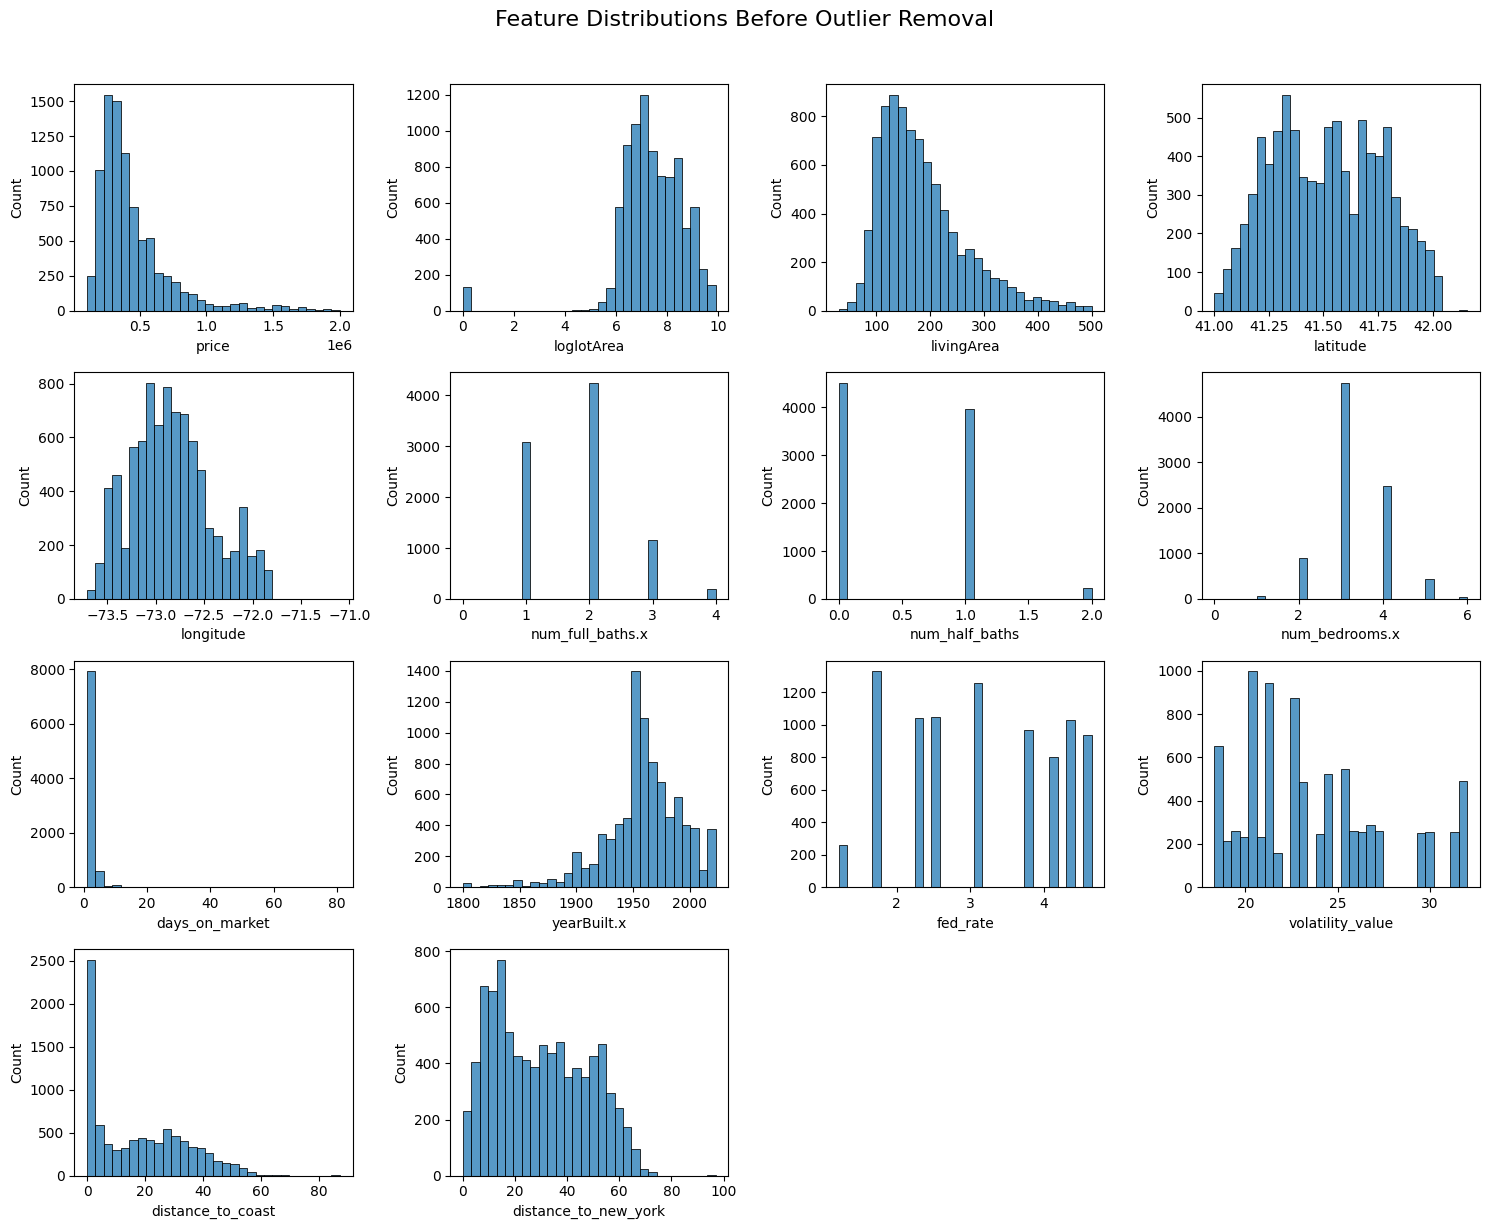

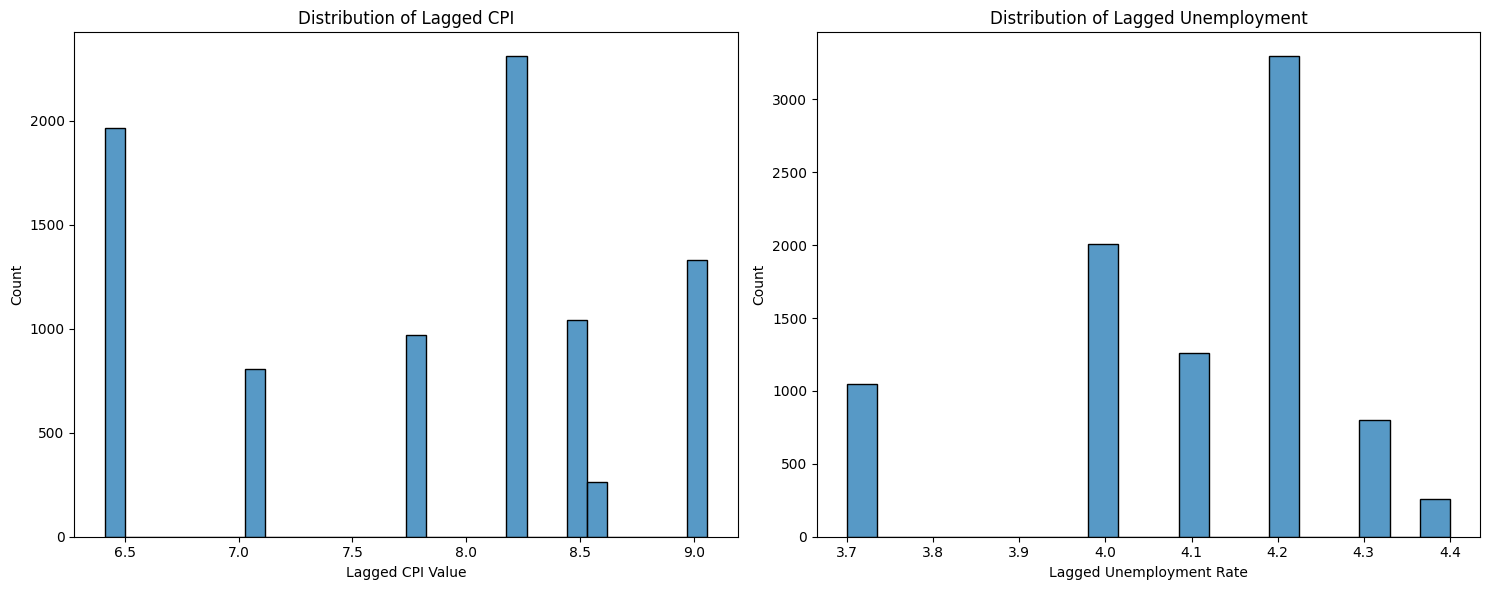

                 feature  outliers  percentage
0                  price       513    5.909457
1             loglotArea       128    1.567091
2             livingArea       245    3.047264
3               latitude         0    0.000000
4              longitude         4    0.051315
5       num_full_baths.x        53    0.680272
6         num_half_baths         0    0.000000
7         num_bedrooms.x        82    1.059705
8         days_on_market       290    3.787879
9            yearBuilt.x       312    4.235677
10              fed_rate         0    0.000000
11            lagged_CPI         0    0.000000
12   lagged_unemployment         0    0.000000
13      volatility_value         0    0.000000
14     distance_to_coast         0    0.000000
15  distance_to_new_york         0    0.000000
Remaining rows after outlier removal: 7054

Cleaned dataset information:
  MYYYY_generation  lotArea  loglotArea  livingArea  price_per_sq_m  \
0           Jan-23     8377    9.033365         300      

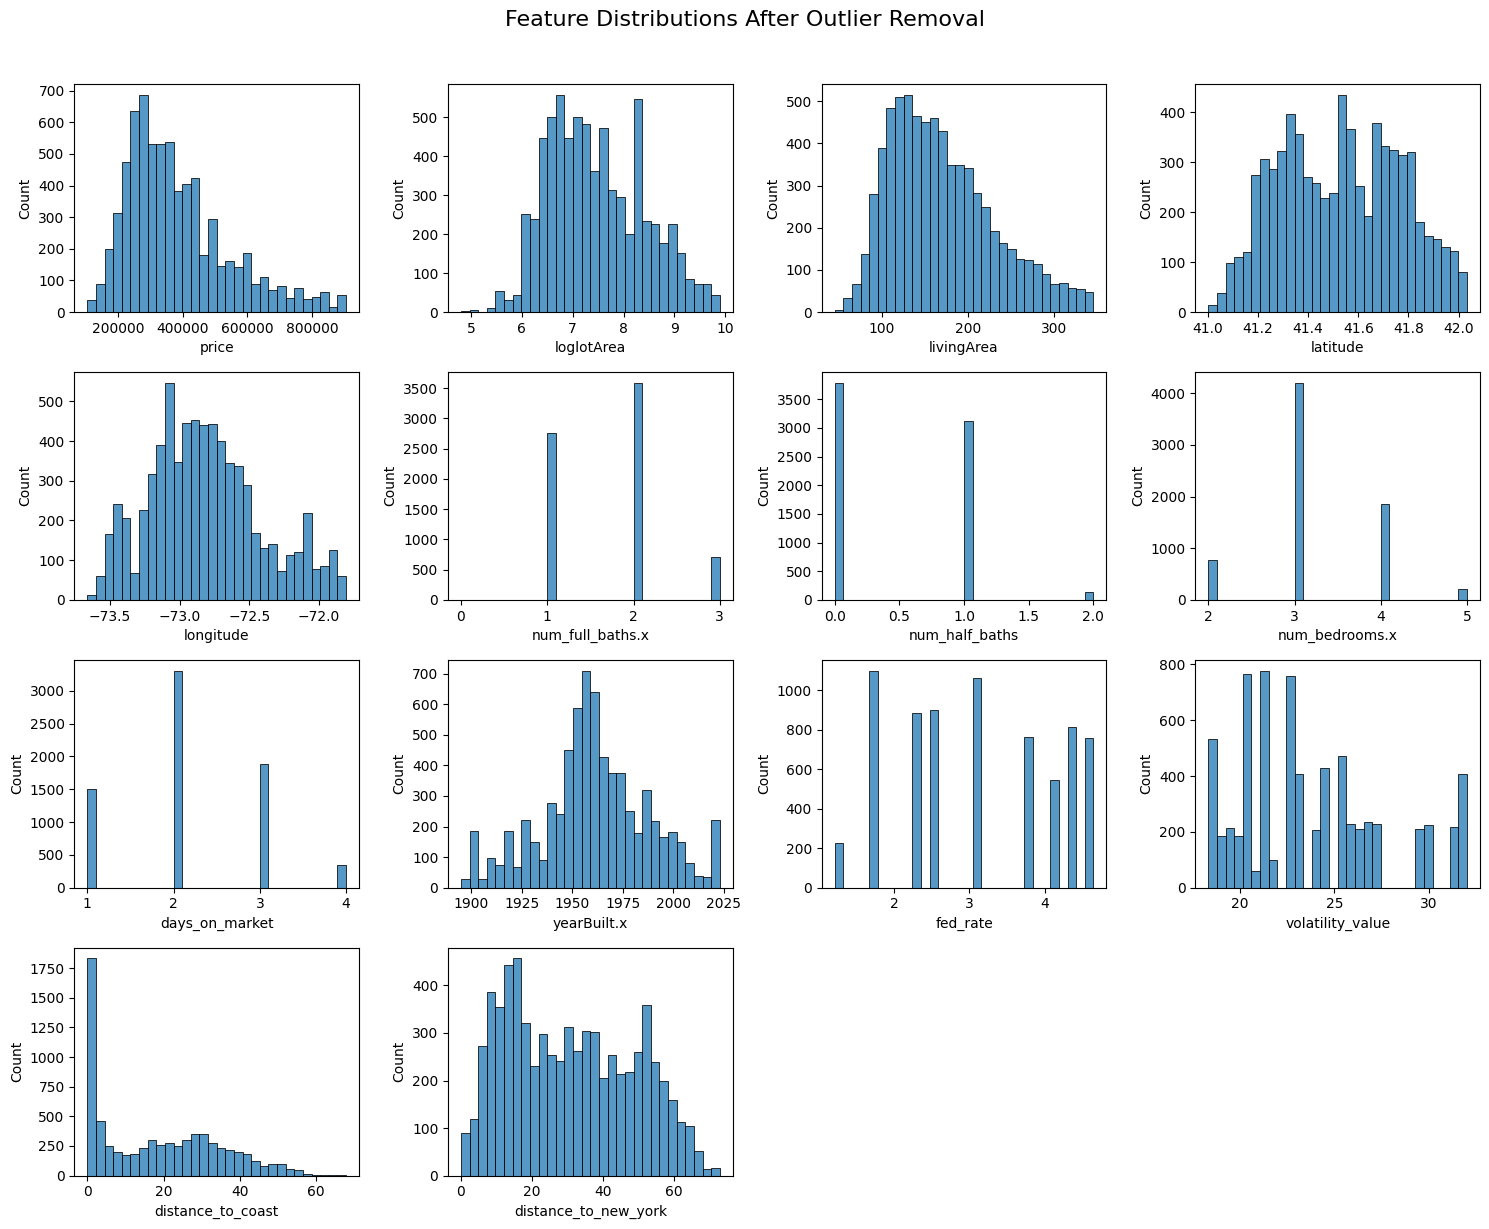

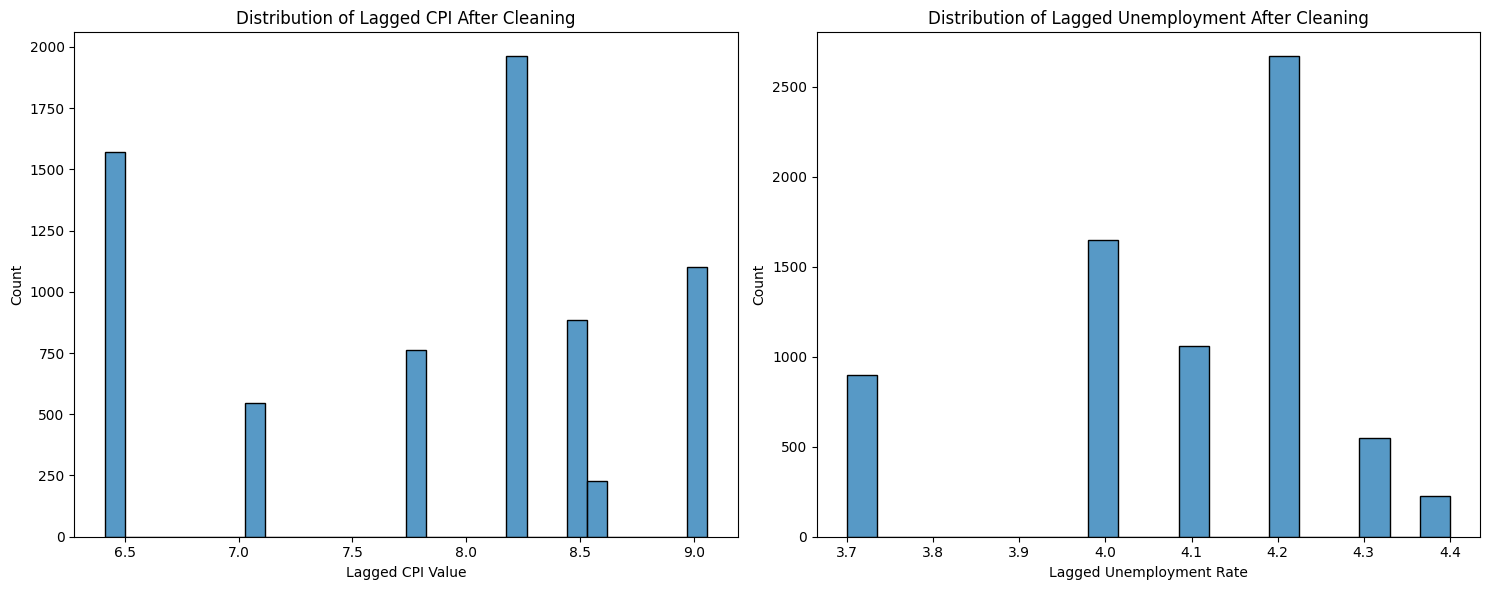

In [182]:
# plotting distributions before outlier removal
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(visualization_features):
    sns.histplot(data=df, x=col, ax=axes[idx], bins=30)

for idx in range(len(visualization_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle("Feature Distributions Before Outlier Removal", y=1.02, fontsize=16)
plt.show()

# plotting lagged variables separately as they were too small in the above visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x='lagged_CPI', bins=30, ax=ax1)
ax1.set_title(f'Distribution of Lagged CPI')
ax1.set_xlabel('Lagged CPI Value')
ax1.set_ylabel('Count')

sns.histplot(data=df, x='lagged_unemployment', bins=20, ax=ax2)
ax2.set_title(f'Distribution of Lagged Unemployment')
ax2.set_xlabel('Lagged Unemployment Rate')
ax2.set_ylabel('Count')

plt.show()

# removing outliers from independent variables using IQR method
df_clean = df.copy()
outlier_stats = []

for feature in numeric_features:
    q1, q3 = df_clean[feature].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df_clean[feature] < lower_bound) | (df_clean[feature] > upper_bound)
    outlier_stats.append({
        'feature': feature,
        'outliers': outliers.sum(),
        'percentage': (outliers.sum()/len(df_clean))*100
    })
    df_clean = df_clean[~outliers]

print(pd.DataFrame(outlier_stats))
print(f"Remaining rows after outlier removal: {len(df_clean)}")

print("\nCleaned dataset information:")
print(df.head())
print(df.columns.tolist())

print("\nCleaned dataset info:")
print(df.info())

# plotting distributions after outlier removal
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(visualization_features):
    sns.histplot(data=df_clean, x=col, ax=axes[idx], bins=30)

for idx in range(len(visualization_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle("Feature Distributions After Outlier Removal", y=1.02, fontsize=16)
plt.show()

# plotting lagged variables after outlier removal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df_clean, x='lagged_CPI', bins=30, ax=ax1)
ax1.set_title(f'Distribution of Lagged CPI After Cleaning')
ax1.set_xlabel('Lagged CPI Value')
ax1.set_ylabel('Count')

sns.histplot(data=df_clean, x='lagged_unemployment', bins=20, ax=ax2)
ax2.set_title(f'Distribution of Lagged Unemployment After Cleaning')
ax2.set_xlabel('Lagged Unemployment Rate')
ax2.set_ylabel('Count')

plt.show()

In [183]:
y = df_clean['price']

# scaling numeric features (excluding price)
scaler = StandardScaler()
features_without_price = [f for f in numeric_features if f != 'price']
X_num = df_clean[features_without_price].copy()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=features_without_price,
    index=X_num.index
)

# using scaled features as final feature set
X = X_num_scaled

print(f"Features: {features_without_price}")
print(f"Total features: {len(X.columns)}")
print(f"Total samples: {len(X)}")

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}") 

Features: ['loglotArea', 'livingArea', 'latitude', 'longitude', 'num_full_baths.x', 'num_half_baths', 'num_bedrooms.x', 'days_on_market', 'yearBuilt.x', 'fed_rate', 'lagged_CPI', 'lagged_unemployment', 'volatility_value', 'distance_to_coast', 'distance_to_new_york']
Total features: 15
Total samples: 7054
Training set size: 4937
Testing set size: 2117


### C2. Tools and Techniques <a id="tools"></a>

The analysis used several Python libraries to explore and understand the Connecticut real estate market using Exploratory Data Analysis (EDA). For data handling and analysis, the pandas library was used to organize and clean the dataset, handling tasks such as removing duplicates, managing missing values, and standardizing data formats. The numpy library helped with numerical operations and calculations, such as computing statistical measures and handling array operations. The visualization of findings used the seaborn and matplotlib libraries which generated informative plots, including histograms, boxplots, and a correlation heatmap. The analysis also used scipy.stats for statistical analysis, including normality tests and correlation analysis, helping to understand the distribution and relationships within the data.

The EDA process was important for understanding the underlying patterns and characteristics of the real estate data before any modeling took place. Through univariate analysis, the distribution of individual features were examined, identifying potential outliers and skewed variables that may need to be handled. The bivariate analysis revealed important relationships between variables, particularly how different features correlated with property prices. This exploratory phase helped identify potential data quality issues, such as missing values and outliers, which were addressed through cleaning techniques. This exploration of the data created a solid foundation for the next modeling phase and helped ensure the reliability of the final analysis.

As the distribution of real estate prices are often skewed, normality testing was preformed through Q-Q plot visualization and the Shapiro-Wilk test to help understand the distribution of the dependent variable. These visualizations will help to assess whether the dataset potentially came from some theoretical distribution (Bobbitt, 2024). The price feature did contain outliers along with several other features, these outliers were removed if they were outside of the IQR thresholds. Any remaining outliers were kept in the dataset. The univariate visualizations, bivariate visualizations, correlation heatmap, and normality testing results are displayed below. 

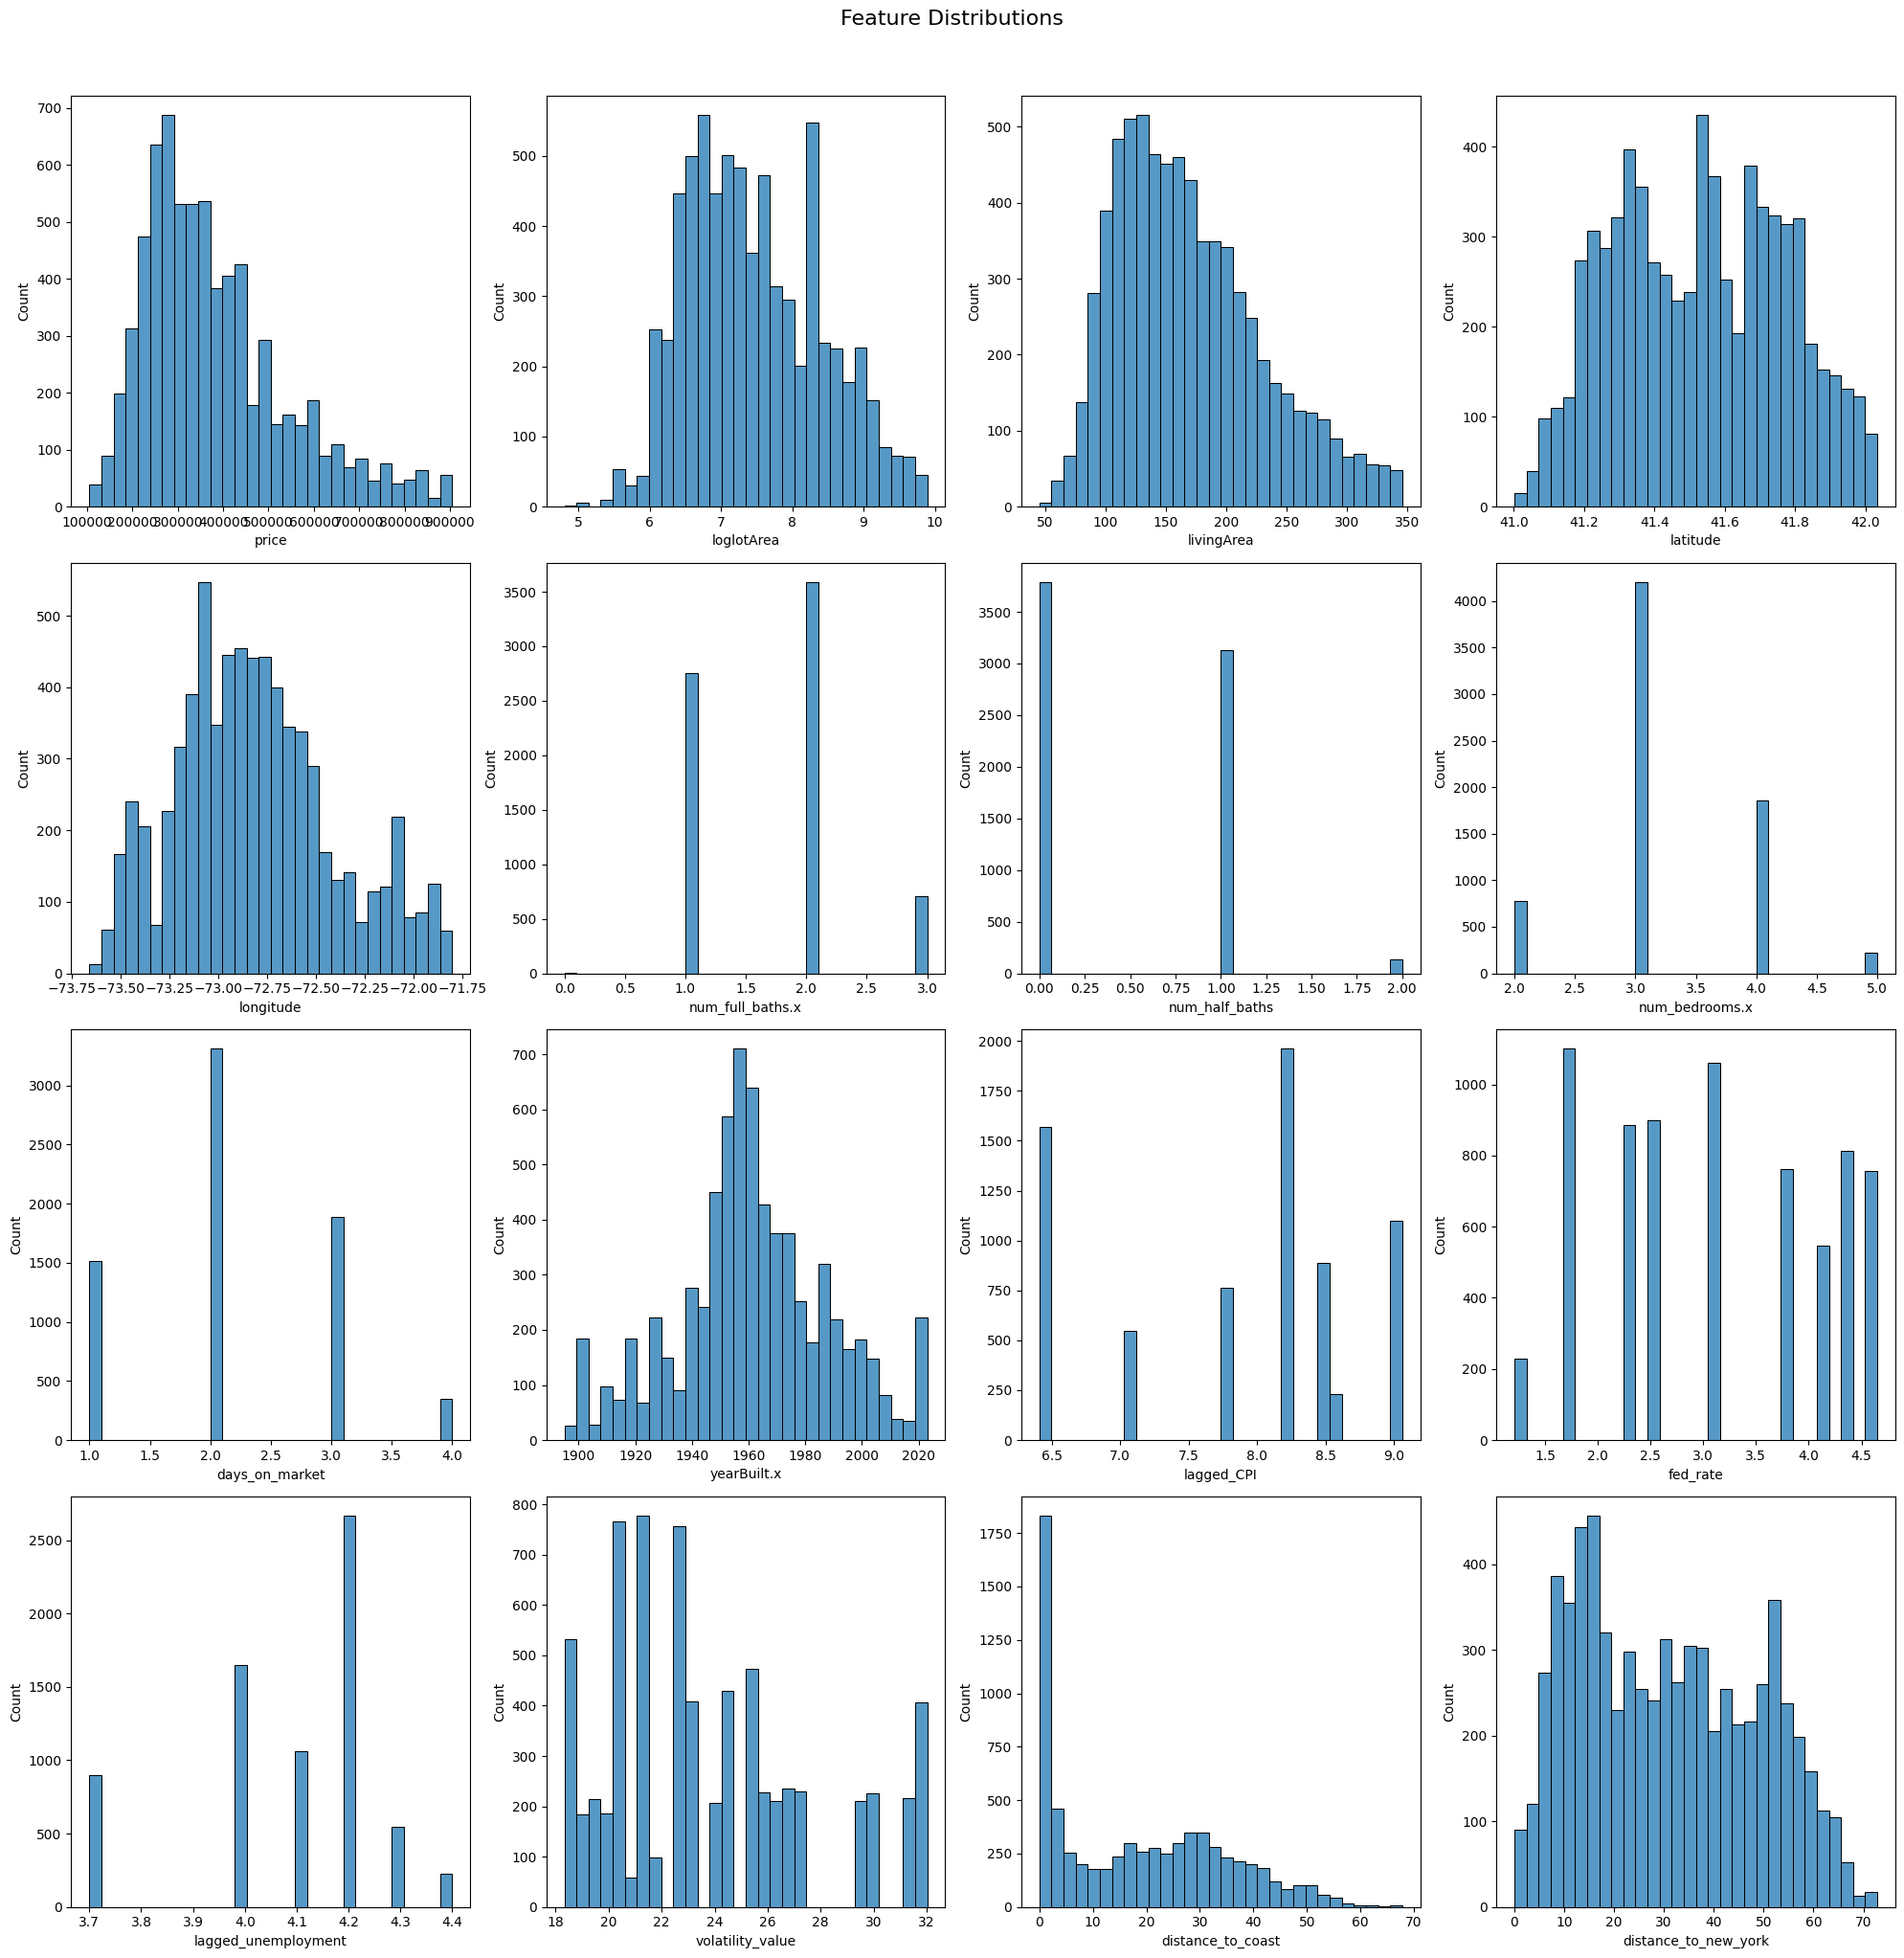

In [184]:
# setting visualization sizes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True

# adding price to features list for visualization
features_to_analyze = [
    'price',
    'loglotArea',
    'livingArea',
    'latitude',
    'longitude',
    'num_full_baths.x',
    'num_half_baths',
    'num_bedrooms.x',
    'days_on_market',
    'yearBuilt.x',
    'lagged_CPI',
    'fed_rate',
    'lagged_unemployment',
    'volatility_value',
    'distance_to_coast',
    'distance_to_new_york'
]

# creating a grid of histograms
n_features = len(features_to_analyze)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.ravel()

for idx, feature in enumerate(features_to_analyze):
    # creating histogram
    sns.histplot(data=df_clean, x=feature, ax=axes[idx], bins=30)

plt.suptitle("Feature Distributions", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

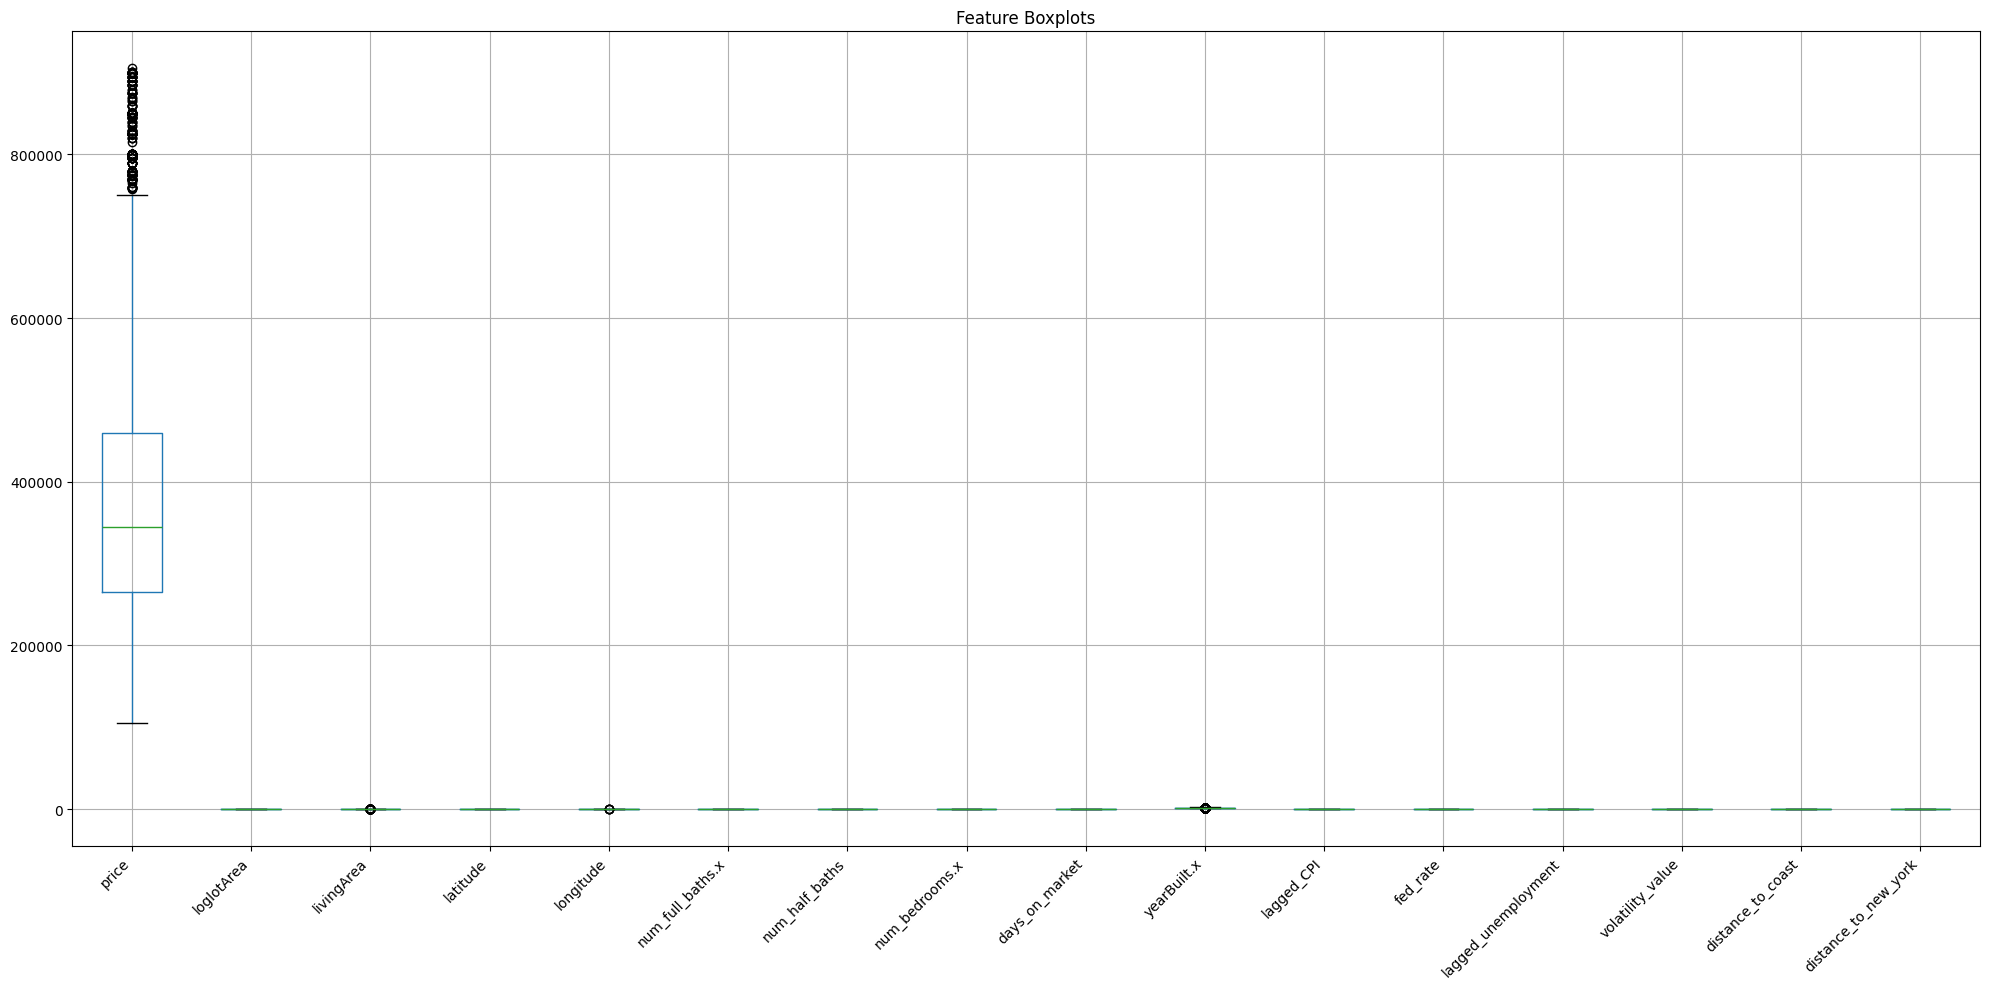

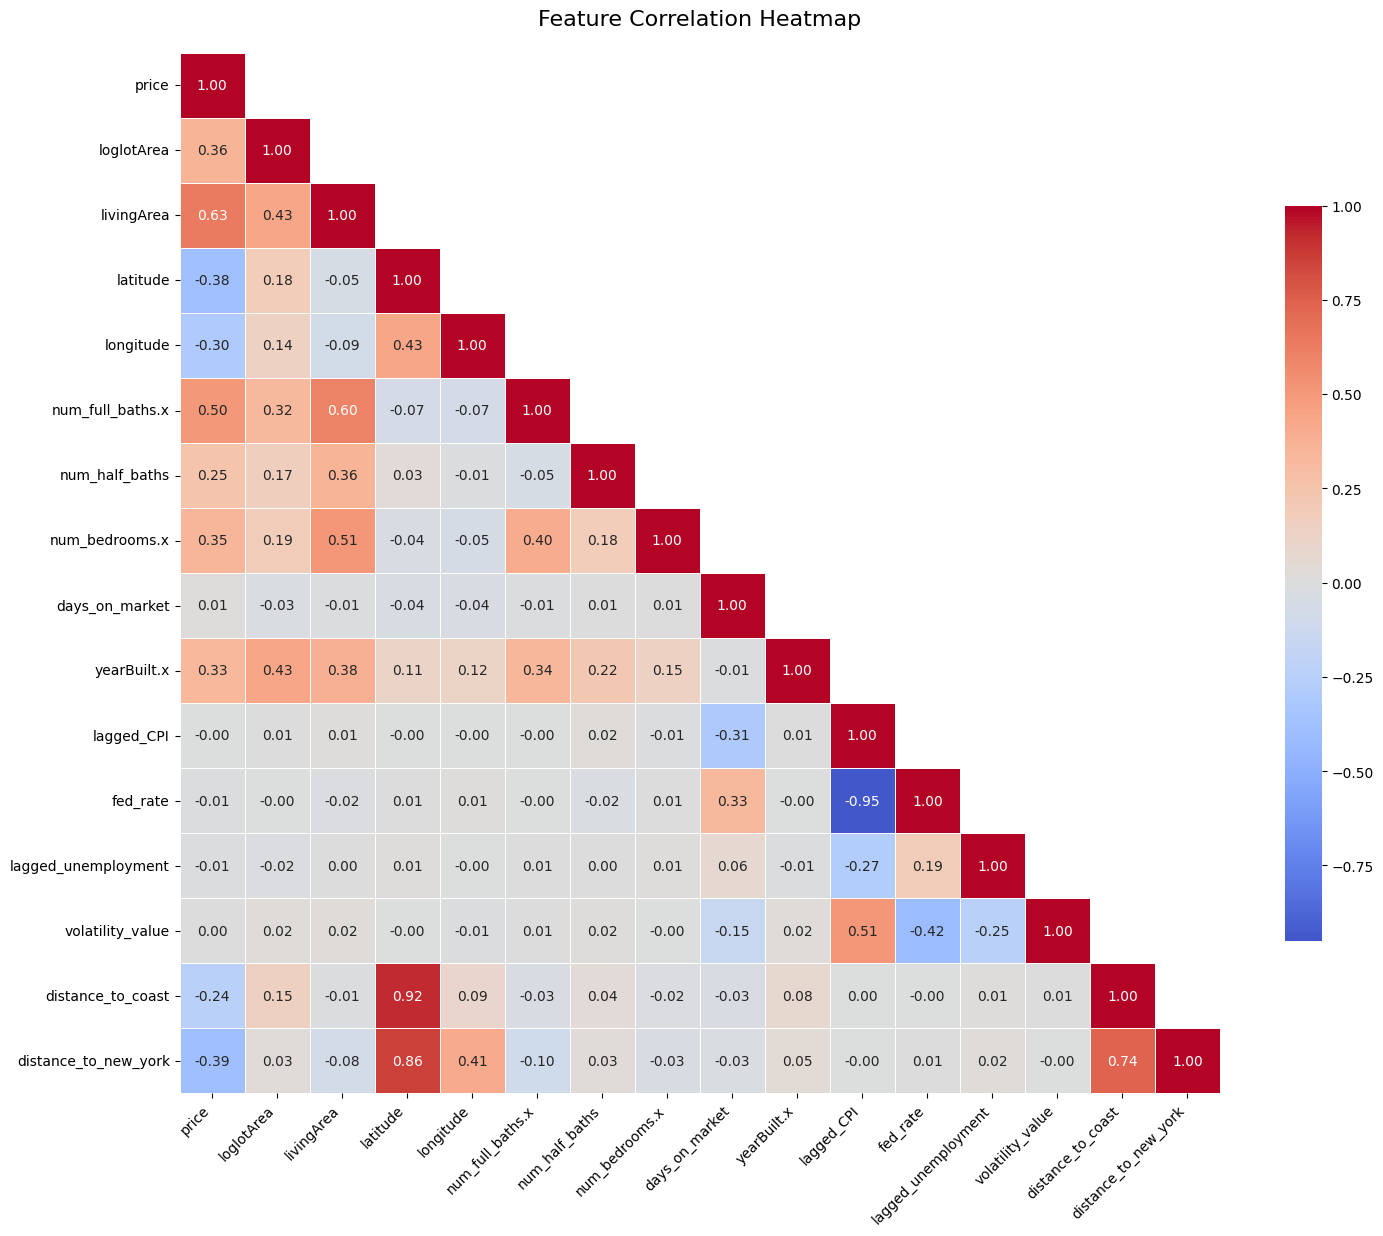

In [185]:
# creating boxplots for all features
plt.figure(figsize=(20, 10))
df_clean[features_to_analyze].boxplot(figsize=(20, 10), rot=45)
plt.title("Feature Boxplots")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# generating a correlation matrix
plt.figure(figsize=(15, 15))
correlation_matrix = df_clean[features_to_analyze].corr()
mask = np.triu(np.ones_like(correlation_matrix), k=1)

# creating the heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Feature Correlation Heatmap', pad=20, size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

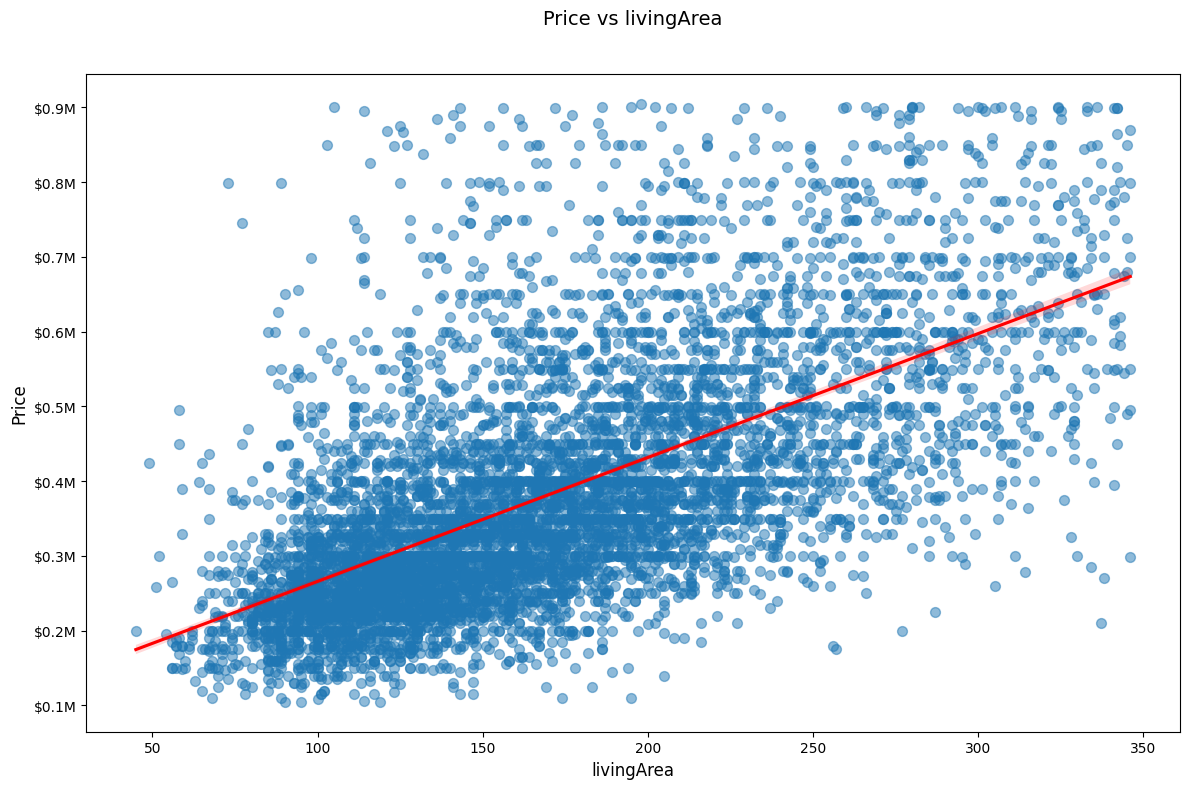

In [186]:
# plotting price vs feature with strongest correlation

numeric_features = [f for f in features_to_analyze if f != 'price']

# finding the feature most correlated with price
correlations_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)
top_feature = correlations_with_price.index[1] 

# creating visualization
plt.figure(figsize=(12, 8))
sns.regplot(data=df_clean, 
           x=top_feature, 
           y='price',
           scatter_kws={'alpha':0.5, 's':50},
           line_kws={'color': 'red'})

# formatting price axis to show millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.title(f'Price vs {top_feature}\n', size=14, pad=20)
plt.xlabel(top_feature, size=12)
plt.ylabel('Price', size=12)
plt.show()

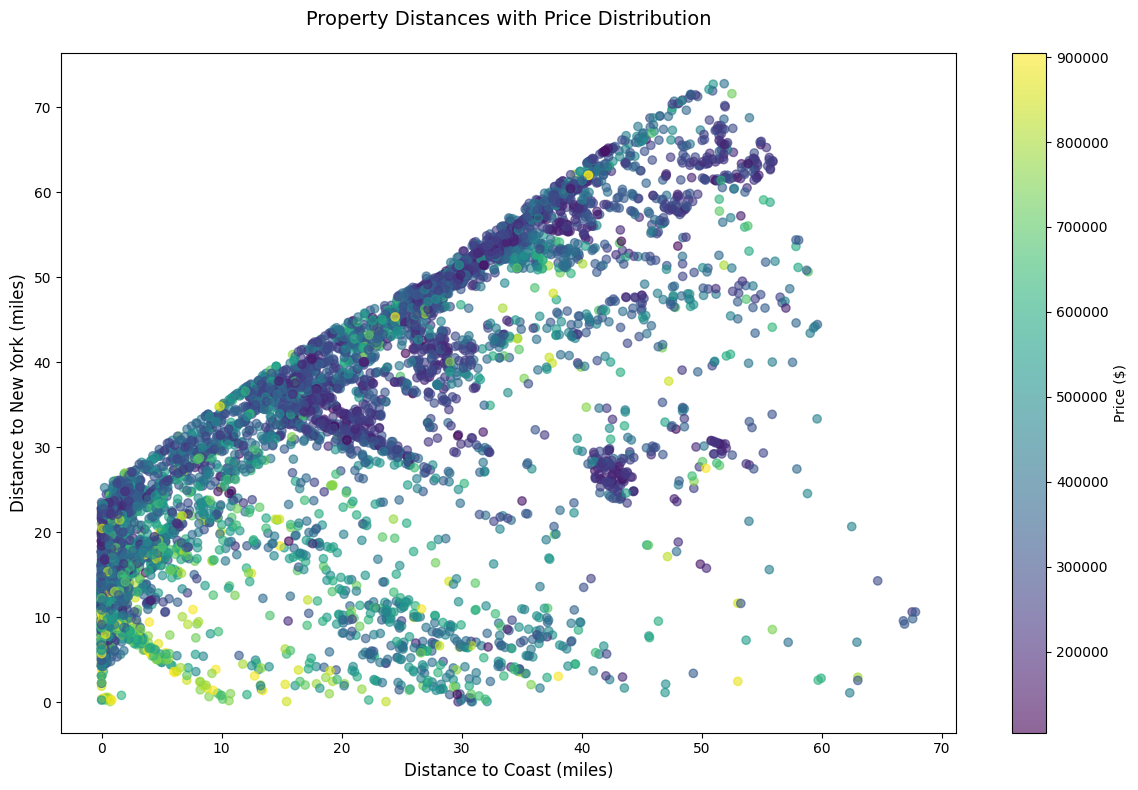

In [187]:
# visualizating property distances on price
plt.figure(figsize=(12, 8))

# creating the scatter plot with price-based coloring
scatter = plt.scatter(df_clean['distance_to_coast'], 
                     df_clean['distance_to_new_york'],
                     c=df_clean['price'],
                     cmap='viridis',
                     alpha=0.6)

plt.title('Property Distances with Price Distribution', size=14, pad=20)
plt.xlabel('Distance to Coast (miles)', size=12)
plt.ylabel('Distance to New York (miles)', size=12)

plt.colorbar(scatter, label='Price ($)')
plt.show()

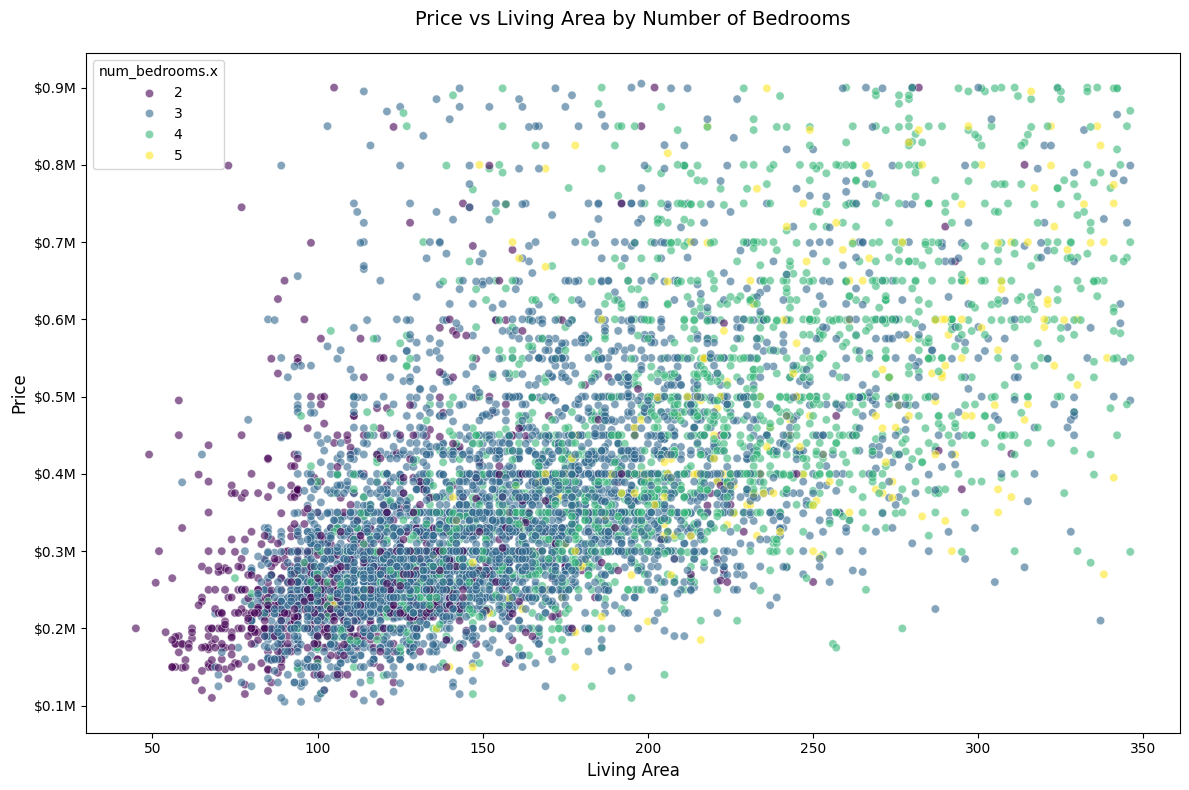

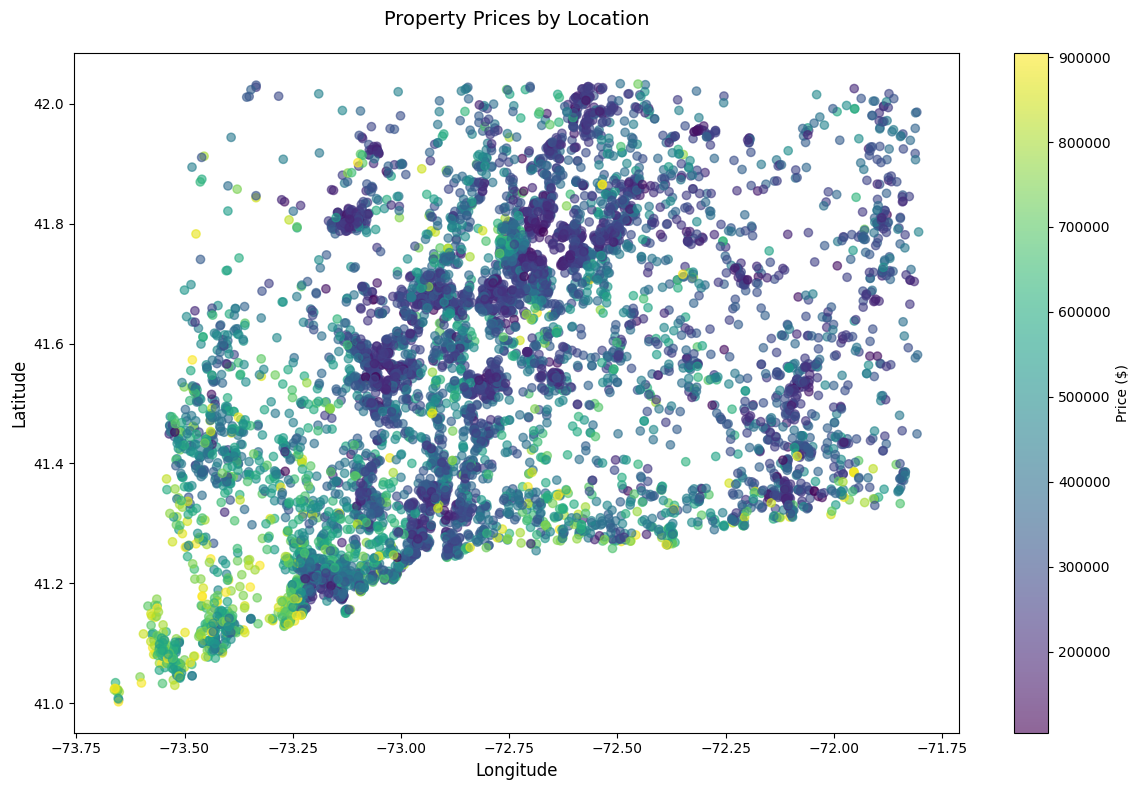

In [188]:
# displaying price vs property features 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, 
                x='livingArea', 
                y='price',
                hue='num_bedrooms.x',
                palette='viridis',
                alpha=0.6)

plt.title('Price vs Living Area by Number of Bedrooms', size=14, pad=20)
plt.xlabel('Living Area', size=12)
plt.ylabel('Price', size=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.show()

# displaying price by locations
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['longitude'], 
                     df_clean['latitude'],
                     c=df_clean['price'],
                     cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter, label='Price ($)')
plt.title('Property Prices by Location', size=14, pad=20)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.show()

Shapiro-Wilk Test
Shapiro-Wilk statistic: 0.922416
p-value: 0.000000
------------------------------------------------------------


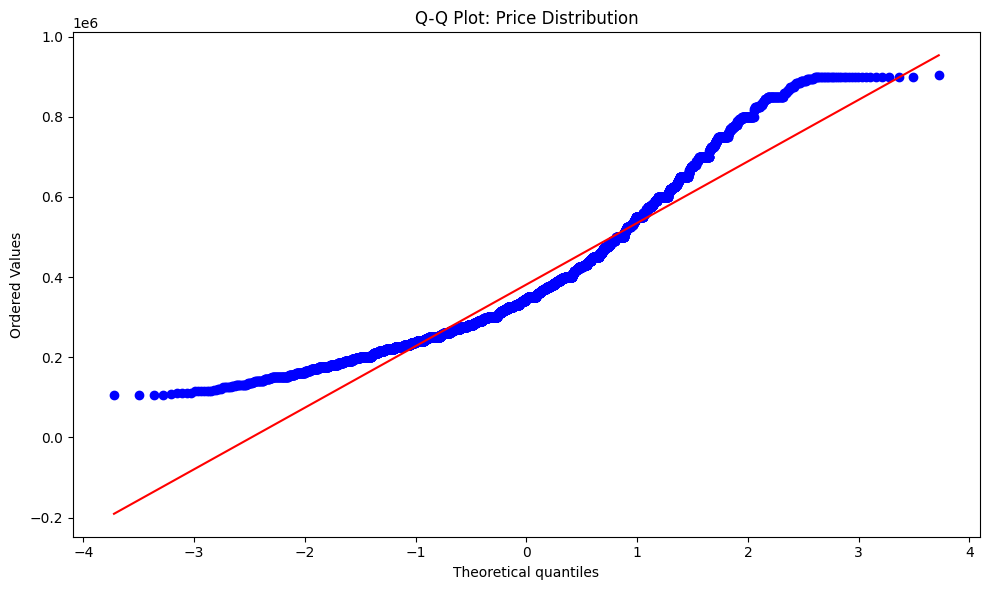

In [189]:
# checking normality of price distribution
import warnings
warnings.filterwarnings('ignore', message='scipy.stats.shapiro: For N > 5000')

# Shapiro-Wilk Test
sw_stat, sw_pvalue = stats.shapiro(df_clean['price'])
print("Shapiro-Wilk Test")
print(f"Shapiro-Wilk statistic: {sw_stat:.6f}")
print(f"p-value: {sw_pvalue:.6f}")
print("-" * 60)

# creating a Q-Q plot for price
plt.figure(figsize=(10, 6))
stats.probplot(df_clean['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Price Distribution')
plt.tight_layout()
plt.show() 

### C3. Justification for Tools <a id="tools-justification"></a>

Both Python and SAS are utilized for data analytics extensively. Python offers a large open-source ecosystem with libraries like pandas, numpy, matplotlib, geopandas, and scikit-learn all of which streamline the data gathering, cleaning, geospatial calculations, regression model, and are all used in this analysis. Meanwhile, SAS provides robust analytics features and an enterprise-grade interface, and is well-suited for larger datasets (GeeksforGeeks, 2023). As the real estate dataset will be filtered down to only CT listings making it a much smaller dataset, meaning the capabilities of SAS may not be needed. R is another potential choice being a capable statistical programming language. When comparing R vs Python, the compatibility with GIS file types such as shapefiles excels in Python (Which Is Better for Spatial Data Analytics: Python or R?  – Locatium AI, 2022). This analysis used Python because of its strong geospatial and machine-learning support libraries, which are ideal for combining property data, shapefile distance calculations, and advanced regression modeling.

Exploratory Data Analysis (EDA) will provide a thorough understanding of the Connecticut real estate dataset before model development. Through EDA, the analysis will examine the distributions of house prices and features such as living area and location, while identifying outliers that could affect the model. This initial exploration will guide feature selection and highlight data quality issues that need addressing before modeling can begin.

This analysis will use two different modeling approaches, Random Forest Regression and Multiple Linear Regression. Random Forest will handle complex relationships without requiring specific data patterns, while Multiple Linear Regression will require certain conditions, including linear relationships and normally distributed residuals. These will be verified using scatter plots, residual analysis, and the Shapiro-Wilk test (Statistics Solutions, 2024). Both models will provide insights that compliment each other. Random Forest excels at capturing non-linear relationships and ranking feature importance, while Multiple Linear Regression will provide interpretable relationships between features and house prices, helping to understand the Connecticut housing market dynamics.

## D. Description of Technique <a id="technique"></a>

The study used two different methods to analyze Connecticut house prices: Random Forest Regression (RFR) and Multiple Linear Regression (MLR). RFR was chosen as the main model because it can handle complex relationships between house features and prices, while MLR was used as a simpler comparison model. RFR's biggest strength is its ability to work with different types of data and automatically show which features matter most, like how much the distance to the coast or New York City affects house prices. An additional benefit of using Random Forest Regression with this dataset is its ability to handle both categorical and numerical inputs, while also handling outliers to a certain extent (The Ultimate Guide to Random Forest Regression, n.d.). However, RFR's main weakness is that it's difficult to explain exactly how it makes its predictions as it cannot extrapolate, it can only make a prediction that is an average of previously observed labels (Thompson, 2021). MLR, on the other hand, is easier to understand because it shows clear numbers for how each feature affects price, but it has the drawback of assuming that relationships between features and prices are linear, which isn't always true as shown by the increasing spread of prediction errors for higher-priced homes. By using both methods together, the analysis aims to combine the best of both worlds: RFR to provide more accurate predictions (with an R^2 score above 0.70), while MLR will be used to explain the relationships in a way that real estate professionals and homeowners can understand.

### D2. Calculations and Output <a id="output"></a>

#### Random Forest Regression:

The Random Forest Regression model used 15 independent variables which were analyzed against the house price dependent variable. The model's R^2 score is 0.7274 which means about 73% of the variability in the data can be explained by the independent variables. This indicates a strong predictive performance, beating the target R^2 threshold of 0.70. The model's Root Mean Square Error (RMSE) of 84,120.73 is the typical size of prediction errors, showing that most predictions fall within this range of the actual house price. The Mean Absolute Error (MAE) of 59,747.44 indicates that, on average, the model's predictions differ from actual house prices by around 60,000. Given that house prices in the dataset range from 100,000 to 800,000 after outliers were handled, these error metrics suggest the model performs well for real estate price prediction. The lower MAE compared to RMSE indicates that while most predictions are reasonably accurate, there are some larger errors that affect the RMSE but don't significantly impact the overall model performance. This level of accuracy makes the model reasonably reliable for estimating Connecticut house prices based on the provided features.

In [190]:
# training the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=4,
    random_state=21,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# calculating the Random Forest metrics
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)

print("\nRandom Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE: ${rf_rmse:,.2f}")
print(f"MAE: ${rf_mae:,.2f}")


Random Forest Performance:
R² Score: 0.7274
RMSE: $84,120.73
MAE: $59,747.44


In [191]:
# printing the feature importances and coefficients
print("\nRandom Forest Feature Importance:")
# getting feature names from training data
feature_names = X_train.columns.tolist()
importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance)


Random Forest Feature Importance:
                 feature  importance
1             livingArea    0.431082
3              longitude    0.203940
2               latitude    0.104493
8            yearBuilt.x    0.072002
14  distance_to_new_york    0.053510
0             loglotArea    0.048777
13     distance_to_coast    0.029917
12      volatility_value    0.015616
4       num_full_baths.x    0.011623
5         num_half_baths    0.006311
11   lagged_unemployment    0.005377
7         days_on_market    0.004731
6         num_bedrooms.x    0.004719
10            lagged_CPI    0.004309
9               fed_rate    0.003595


From the feature importance outputs above, the following features have P-values greater than 0.05: livingArea, longitude, latitude, yearBuilt.x, and distance_to_new_york. The distance_to_coast feature is not as significant in this model when compared with the distance_to_new_york feature. The top three features alone account for about 74% of the model's predictive power, with living area being the main predictor at 43%. This suggests that house size and location (longitude/latitude) are the most crucial factors in determining house prices in Connecticut. The year the house was built and its distance to New York also play a role, while factors like the number of bathrooms, bedrooms, fed_rate, and lagged_CPI have relatively minimal impact on price predictions.

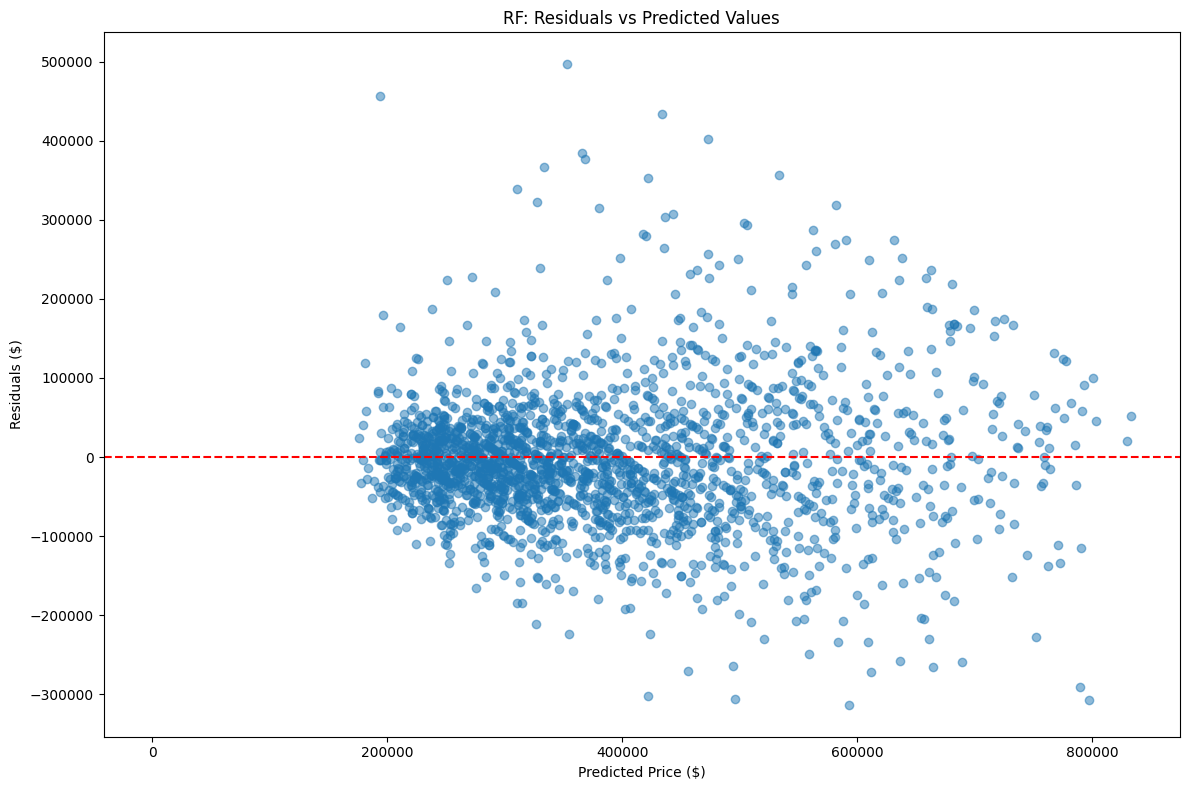


Residual Statistics:

Random Forest Residuals:
Mean: $-4,508.42
Std Dev: $84,019.67
Skewness: 0.782
Kurtosis: 3.727

Residual Normality Tests:

Random Forest:
Normality test p-value: 0.000000


In [192]:
# calculating the residuals
rf_residuals = y_test - rf_pred

# random forest: residuals vs predicted
plt.plot(2, 4, 1)
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('RF: Residuals vs Predicted Values')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')

plt.tight_layout()
plt.show()

# printing residual statistics
print("\nResidual Statistics:")
print("\nRandom Forest Residuals:")
print(f"Mean: ${rf_residuals.mean():,.2f}")
print(f"Std Dev: ${rf_residuals.std():,.2f}")
print(f"Skewness: {stats.skew(rf_residuals):.3f}")
print(f"Kurtosis: {stats.kurtosis(rf_residuals):.3f}")

# testing residuals for normality
print("\nResidual Normality Tests:")
print("\nRandom Forest:")
_, rf_norm_p = stats.normaltest(rf_residuals)
print(f"Normality test p-value: {rf_norm_p:.6f}")

The Random Forest model's residual analysis above shows how well the property price predictions match the actual prices. The average prediction error (mean) is -4,508.42, meaning the model typically underestimates prices by about 4,500, which is relatively small considering the house prices range. The standard deviation of 84,019.67 shows how much these errors typically vary from the average. 

Based on the scatter plot above, the residuals spread out in a fan shape around the zero line shown in red. This pattern shows that prediction errors tend to get larger for more expensive houses. The skewness value of 0.782 indicates the errors are slightly tilted toward positive values, while the kurtosis of 3.727 suggests the model has slightly more extreme errors than expected in a perfect normal distribution.

The normality test p-value of 0.00 indicates that these residuals do not follow a perfectly normal distribution. Despite these deviations from perfect normality, the model's overall performance (R^2 score of 0.73) suggests it is still capable of making reliable predictions for Connecticut house prices.

In [193]:
# defining the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# performing cross-validation for random forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='r2')
print("\nRandom Forest Cross-Validation Results:")
print(f"R² scores for each fold: {rf_cv_scores}")
print(f"Mean R² score: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")


Random Forest Cross-Validation Results:
R² scores for each fold: [0.75448639 0.72052467 0.73609116 0.7274509  0.70955225]
Mean R² score: 0.7296 (+/- 0.0303)


The Random Forest model showed consistent performance across five-fold cross-validation, with R^2 scores ranging from 0.71 to 0.754. The mean R^2 score of 0.73 indicates that, on average, the model explains about 73% of the variance in house prices, with a relatively small standard deviation of plus or minus 0.03. This narrow range of scores across different folds suggests that the model generalizes well to unseen data, rather than being overly sensitive to a subset of the dataset. The lowest score of 0.71 still beats the target threshold of 0.70, indicating reliable predictive performance even in the model's worst-case performance.

#### Multiple Linear Regression:

As a comparison, both an initial and refined Multiple Linear Regression model were created. The initial model included all 15 independent variables and achieved a R² score of 0.666, indicating that approximately 66.6% of the variability in house prices could be explained by the model. However, several variables in the initial model were not statistically significant (p > 0.05), including number of bedrooms, days on market, fed rate, lagged CPI, lagged unemployment, and volatility value.

To improve the model, a backward elimination process was performed, removing variables with p-values greater than 0.05, while also considering multicollinearity through Variance Inflation Factors (VIF). Variables with VIFs above 5, indicating high multicollinearity (GeeksforGeeks, 2025), were removed, starting with latitude (VIF: 38.30) and lagged CPI (VIF: 12.87). The refined model retained 8 significant independent variables with a R^2 of 0.597 on the training data and 0.603 on the test set, with improved efficiency as shown by the higher F-statistic (913.3 compared to 655.4). However, the AIC/BIC scores were higher in the refined model (490.0/548.5 compared to -426.9/-322.9), suggesting some loss of information. The refined model's RMSE of 101,463.73 and MAE of 70,491.12 showed slightly higher errors than the initial model, but with the benefit of a refined model using only statistically significant predictors. Cross-validation results (mean R^2 of 0.569) suggest the model's true predictive performance might be somewhat lower, but still provides meaningful insights through coefficients that clearly show how each feature influences house prices.

In [194]:
# initial MLR Model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
y_train_log = np.log1p(y_train)

# fitting initial model with all features
initial_model = sm.OLS(y_train_log, X_train_sm).fit()
print("\nInitial Model Summary:")
print(initial_model.summary())


Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     655.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:26:25   Log-Likelihood:                 229.47
No. Observations:                4937   AIC:                            -426.9
Df Residuals:                    4921   BIC:                            -322.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const   

In [195]:
# backward elimination process with VIF and p-value checks
features_to_keep = list(X_train.columns)
X_current = X_train.copy()
max_p_value = 0.05
vif_threshold = 5.0

while True:
    # calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = features_to_keep
    vif_data["vif"] = [variance_inflation_factor(X_train[features_to_keep].values, i) 
                       for i in range(len(features_to_keep))]
    vif_data = vif_data.sort_values('vif', ascending=False)
    
    # checking if any VIF exceeds threshold
    if vif_data['vif'].max() > vif_threshold:
        max_vif_feature = vif_data.iloc[0]['feature']
        print(f"Removing {max_vif_feature} due to high VIF: {vif_data.iloc[0]['vif']:.4f}")
        features_to_keep.remove(max_vif_feature)
        X_current = X_train[features_to_keep]
        continue
    
    # if VIF check passes, checking p-values
    X_with_const = sm.add_constant(X_current)
    model = sm.OLS(y_train_log, X_with_const).fit()
    p_values = model.pvalues[1:]
    max_p = p_values.max()
    
    if max_p > max_p_value:
        max_p_feature = p_values.idxmax()
        print(f"Removing {max_p_feature} with p-value: {max_p:.4f}")
        features_to_keep.remove(max_p_feature)
        X_current = X_train[features_to_keep]
    else:
        break

print("\nFinal selected features:", features_to_keep)

Removing latitude due to high VIF: 38.3008
Removing lagged_CPI due to high VIF: 12.8666
Removing fed_rate with p-value: 0.5524
Removing lagged_unemployment with p-value: 0.4628
Removing days_on_market with p-value: 0.3814
Removing volatility_value with p-value: 0.0951
Removing num_bedrooms.x with p-value: 0.0660

Final selected features: ['loglotArea', 'livingArea', 'longitude', 'num_full_baths.x', 'num_half_baths', 'yearBuilt.x', 'distance_to_coast', 'distance_to_new_york']


In [196]:
# refined mlr model
X_train_refined = sm.add_constant(X_train[features_to_keep])
X_test_refined = sm.add_constant(X_test[features_to_keep])
refined_model = sm.OLS(y_train_log, X_train_refined).fit()

# calculating final VIF values for refined model
final_vif_data = pd.DataFrame()
final_vif_data["feature"] = features_to_keep
final_vif_data["vif"] = [variance_inflation_factor(X_train[features_to_keep].values, i) 
                         for i in range(len(features_to_keep))]
print("\nVIF values after refinement:")
print(final_vif_data.sort_values('vif', ascending=False))

print("\nRefined Model Summary:")
print(refined_model.summary())

# making predictions with refined model
y_pred_log = refined_model.predict(X_test_refined)
y_pred = np.expm1(y_pred_log)

# calculating performance metrics
refined_r2 = r2_score(y_test, y_pred)
refined_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
refined_mae = mean_absolute_error(y_test, y_pred)

print("\nRefined MLR Model Performance:")
print(f"R² Score: {refined_r2:.4f}")
print(f"RMSE: ${refined_rmse:,.2f}")
print(f"MAE: ${refined_mae:,.2f}")


VIF values after refinement:
                feature       vif
7  distance_to_new_york  3.041970
6     distance_to_coast  2.600456
1            livingArea  2.207051
3      num_full_baths.x  1.864391
0            loglotArea  1.508714
2             longitude  1.490621
5           yearBuilt.x  1.401342
4        num_half_baths  1.348030

Refined Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     913.3
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:26:26   Log-Likelihood:                -235.98
No. Observations:                4937   AIC:                             490.0
Df Residuals:                    4928   BIC:                             548.5
Df Model

In [197]:
print("\nRefined MLR Coefficients:")
coef_df = pd.DataFrame({
    'feature': features_to_keep,
    'coefficient': refined_model.params[1:],
    'p_value': refined_model.pvalues[1:]
}).sort_values('coefficient', key=abs, ascending=False)
print(coef_df)


Refined MLR Coefficients:
                                   feature  coefficient        p_value
livingArea                      livingArea     0.137990  5.284597e-135
num_full_baths.x          num_full_baths.x     0.079149   7.251985e-57
distance_to_new_york  distance_to_new_york    -0.074793   6.921304e-32
longitude                        longitude    -0.074521   2.601371e-63
loglotArea                      loglotArea     0.058528   7.949768e-40
distance_to_coast        distance_to_coast    -0.049466   3.010327e-17
yearBuilt.x                    yearBuilt.x     0.046870   2.982439e-27
num_half_baths              num_half_baths     0.042257   1.457351e-23


The MLR coefficients above show how each feature influences house prices in Connecticut. Living area was the strongest predictor with a positive relationship, where one standard deviation increase corresponds to a 13.8% increase in price, indicating higher prices for larger homes. Number of full bathrooms showed a significant positive coefficient of 7.9%, meaning houses with more bathrooms are worth more. Distance to New York had a negative relationship of -7.5%, which means properties closer to New York are more valuable, as increasing distance from New York leads to lower prices. Longitude showed a negative relationship of -7.5%, suggesting lower prices as properties move to the east of the state. Other positive influences include the log-transformed lot area (5.9%) and distance to coast had a negative coefficient of -4.9%, which similarly to the New York distance, means properties closer to the coast are more valuable. Year built (4.7%) and number of half bathrooms (4.2%) showed positive effects, with newer homes asking higher prices.


Refined MLR Residual Statistics:
Mean: $8,340.78
Std Dev: $101,144.22
Skewness: 1.263
Kurtosis: 4.045

Refined MLR Residual Normality Test:
Normality test p-value: 0.000000


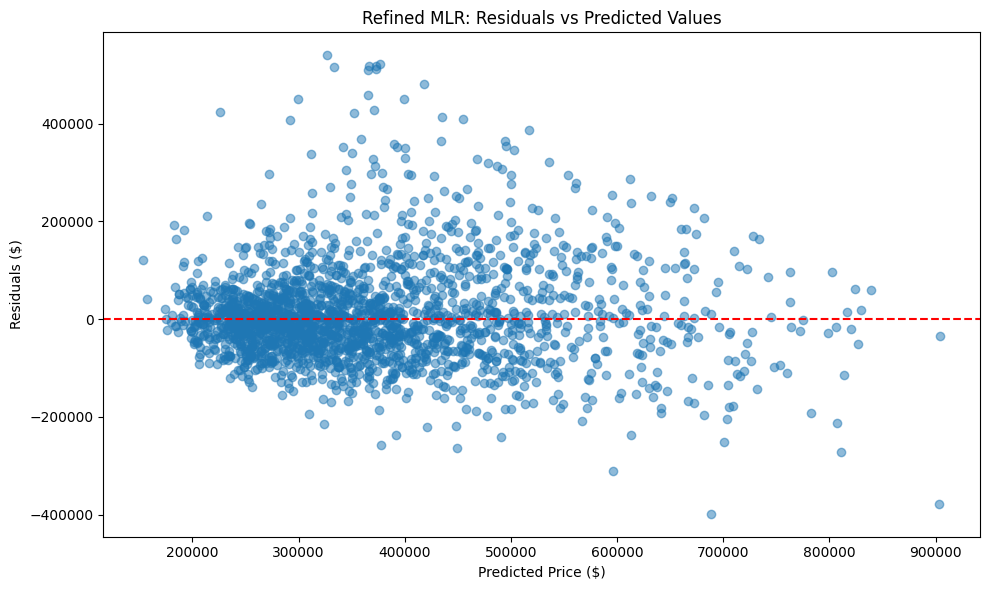

In [198]:
# calculating residuals for refined model
residuals = y_test - y_pred

# printing residual statistics
print("\nRefined MLR Residual Statistics:")
print(f"Mean: ${residuals.mean():,.2f}")
print(f"Std Dev: ${residuals.std():,.2f}")
print(f"Skewness: {stats.skew(residuals):.3f}")
print(f"Kurtosis: {stats.kurtosis(residuals):.3f}")

# testing residuals for normality
print("\nRefined MLR Residual Normality Test:")
_, norm_p = stats.normaltest(residuals)
print(f"Normality test p-value: {norm_p:.6f}")

# creating residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Refined MLR: Residuals vs Predicted Values')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.show() 

The refined MLR model's residual analysis above shows the accuracy of property price predictions compared to actual prices. The average prediction error (mean) is 8,340.78, indicating the model slightly underestimates prices by about 8,300, which is small given the house price ranges. The standard deviation of 101,144.22 shows how much these errors typically deviate from the average.

In the scatter plot shown above, the residuals, similar to Random Forest, show a fan shape pattern around the zero line, with the spread of errors increasing as predicted prices rise. This suggests that the model's prediction accuracy decreases for higher-priced properties, even after log transforming the price dependent variable. The skewness value of 1.263 indicates the errors are moderately skewed toward positive values, while the kurtosis of 4.045 suggests the distribution of errors has more extreme values than a normal distribution would have.

The normality test p-value of 0.00 shows that these residuals deviate from a normal distribution, which is one of the assumptions of linear regression. This indicates that even after refining through backward elimination and checking VIF scores the model may not be fully capturing the relationships in Connecticut's housing market, particularly for higher-priced properties.

In [199]:
# cross-validation with 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# performing cross-validation
for train_idx, test_idx in cv.split(X_train[features_to_keep]):  # Use features_to_keep instead of features_for_mlr
    # splitting and transforming data
    X_train_cv = X_train[features_to_keep].iloc[train_idx]
    X_test_cv = X_train[features_to_keep].iloc[test_idx]
    y_train_cv = y_train.iloc[train_idx]
    y_test_cv = y_train.iloc[test_idx]
    
    # log transforming, fitting, predicting, and transforming back
    y_train_log = np.log1p(y_train_cv)
    model = LinearRegression()
    model.fit(X_train_cv, y_train_log)
    y_pred = np.expm1(model.predict(X_test_cv))
    
    # calculating R2 score
    cv_scores.append(r2_score(y_test_cv, y_pred))

# printing results
print("\nRefined MLR Cross-Validation Results:")
print(f"R² scores for each fold: {cv_scores}")
print(f"Mean R² score: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Refined MLR Cross-Validation Results:
R² scores for each fold: [0.5570864762550605, 0.5845382014980369, 0.5443719162095859, 0.6122447023526854, 0.5485280921702158]
Mean R² score: 0.5694 (+/- 0.0512)
Standard deviation: 0.0256


The Multiple Linear Regression model demonstrated decent performance across five-fold cross-validation, with R^2 scores ranging from 0.544 to 0.612. The mean R^2 score of 0.569 indicates that, on average, the model explains about 57% of the variance in house prices, with a standard deviation of plus or minus 0.026. This relatively consistent range of scores across different folds suggests that while the model's performance is stable, it captures less of the price variation compared to the Random Forest model. The highest score of 0.612 in the fourth fold shows the model's potential under optimal conditions, while the lowest score of 0.544 indicates that the linear assumptions may not fully capture the complex relationships in Connecticut's housing market. The moderate spread in R^2 scores (approximately 0.07 between highest and lowest) suggests that the model's performance is reasonably consistent, though not as good as the Random Forest model's performance.

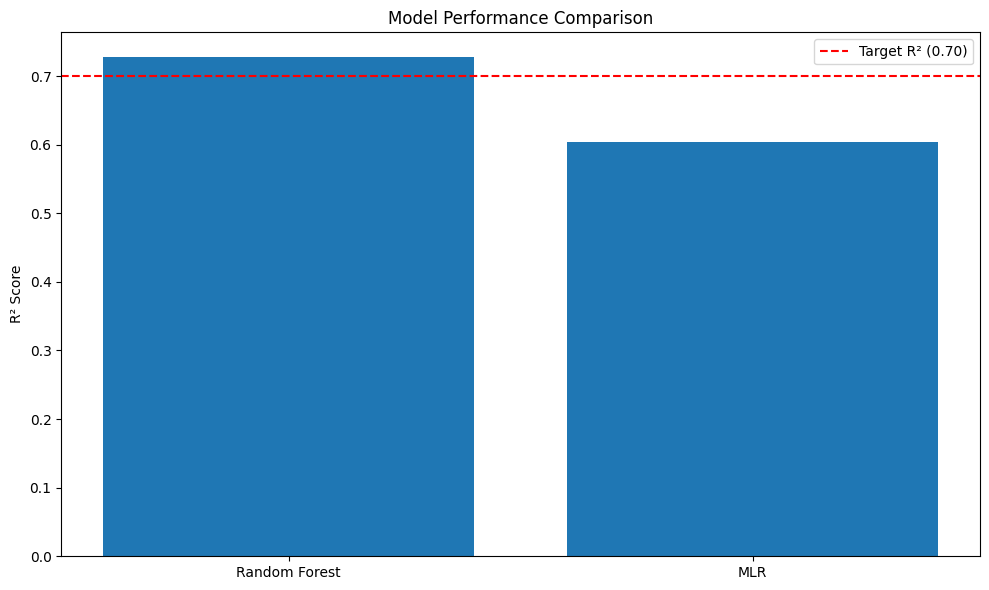

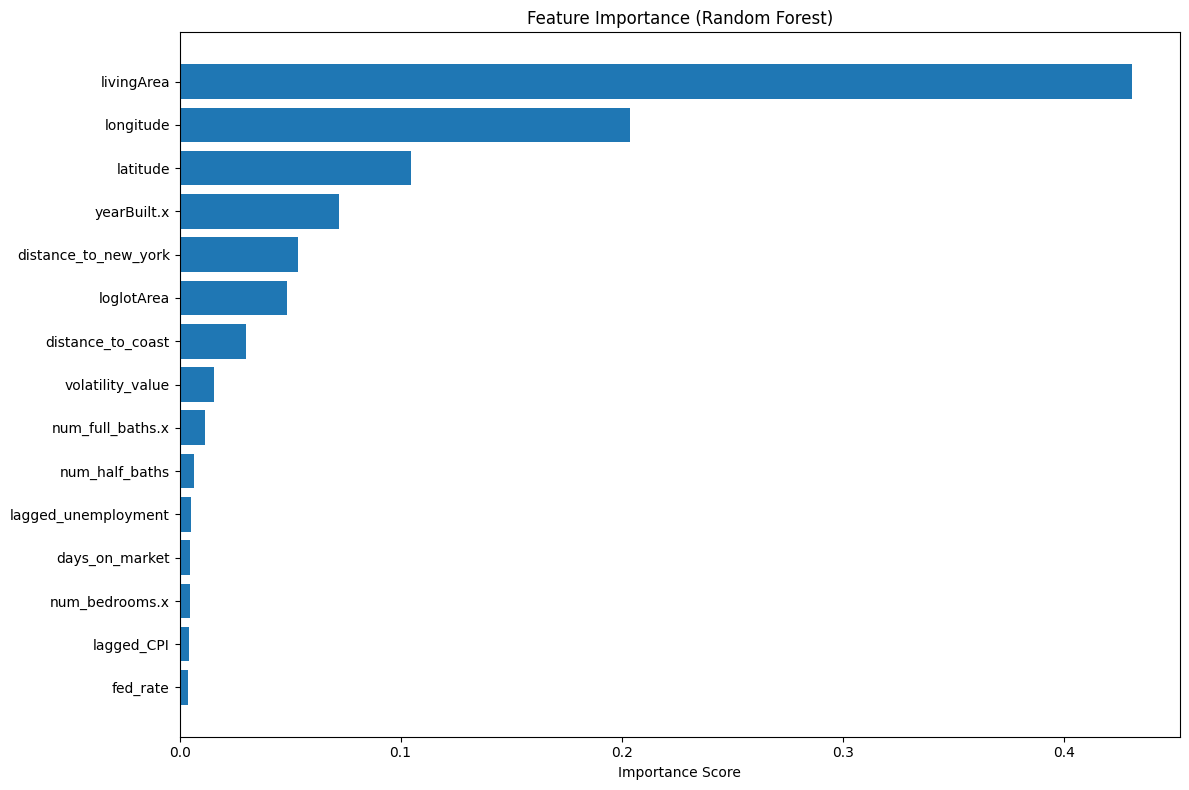

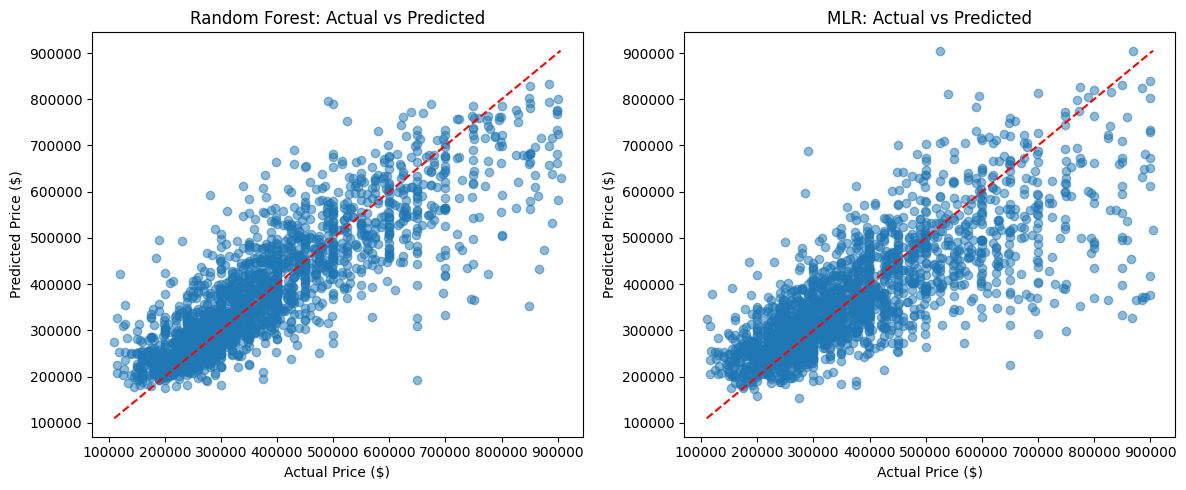

In [200]:
# displaying model comparisons

rf_pred = rf_model.predict(X_test)
X_test_refined = sm.add_constant(X_test[features_to_keep])
y_pred_log = refined_model.predict(X_test_refined)
y_pred = np.expm1(y_pred_log)

# plotting model comparisons
plt.figure(figsize=(10, 6))
models = ['Random Forest', 'MLR']
r2_scores = [rf_r2, refined_r2]
plt.bar(models, r2_scores)
plt.axhline(y=0.70, color='r', linestyle='--', label='Target R² (0.70)')
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# displaying feature importance
plt.figure(figsize=(12, 8))
importance_plot = importance.sort_values('importance', ascending=True)
plt.barh(importance_plot['feature'], importance_plot['importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# plotting actual vs predicted prices
plt.figure(figsize=(12, 5))

# random forest predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')

# mlr predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('MLR: Actual vs Predicted')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout()
plt.show()

### D3. Justification of Analysis <a id="analysis-justification"></a>

Random Forest Regression was chosen as the main analysis technique due to its ability to handle non-linear relationships and complex interactions between features in real estate data. The algorithm's ensemble approach, which combines multiple decision trees, makes it particularly well-suited for capturing the diverse factors influencing house prices, such as location effects (distance to coast and New York) and property characteristics (living area, bathrooms). An advantage of Random Forest is its robust performance, as shown by the high R^2 score of 0.73 and consistent cross-validation results ranging from 0.71 to 0.75, indicating strong predictive accuracy. A disadvantage is the model's inability to extrapolate, making it difficult to interpret exactly how each feature influences the predicted prices, which is particularly important in real estate valuation where stakeholders need to understand the reasoning behind price predictions.

Multiple Linear Regression was chosen as a complementary analysis technique to provide understandable insights into feature relationships while being used as a baseline for model performance. The technique's ability to provide additional insights of each feature through coefficients (living area's 13.8% price increase per standard deviation) makes it valuable for understanding market dynamics. An advantage of MLR is its interpretability, allowing stakeholders to clearly understand how changes in specific features affect house prices. A disadvantage is the assumption of linear relationships between features and price, which led to lower performance (mean R^2 of 0.569 in cross-validation) compared to Random Forest, this indicates that many relationships in the Connecticut housing market are non-linear and more complex than what a linear model can capture.

## E. Results & Limitations <a id="results"></a>

The analysis of Connecticut real estate data effectively addressed the research question regarding whether a Random Forest model could predict house prices with a R^2 above 0.70 using distance-based features. The Random Forest model achieved a R^2 of 0.73, successfully exceeding the target threshold and demonstrating that proximity to the coast and New York City, along with other property characteristics, can reliably predict house prices. The model's consistent performance across cross-validation (R^2 ranging from 0.71 to 0.75) indicates decent predictive capability, while feature importance rankings showed that location-based features, particularly distance to coast, were among the top predictors of property values. One limitation is that the model's training data spans a specific time period, which may not capture the full range of market conditions or seasonal variations in Connecticut's real estate market. Future analysis should utilize a larger dataset with more properties across a longer timeframe to increase the model's accuracy.

The Multiple Linear Regression analysis provided additional insights and a baseline comparison, achieving a R^2 of 0.603 on the test set and 0.569 in cross-validation. While not matching the Random Forest's performance, the MLR model did show additional relationship insights, the living area had the strongest positive influence (13.8% per standard deviation), followed by the number of full bathrooms (7.9%), while both distance measures showed significant negative relationships (distance to New York: -7.5%, distance to coast: -4.9%). These coefficients provide clear evidence that proximity to both the coast and New York City significantly impacts property values, though the lower R^2 scores suggest that these relationships are not purely linear. A limitation is that the model's assumptions of linearity and feature independence may oversimplify the complex relationships between location, property characteristics, and market conditions in determining house prices.

The null hypothesis for this analysis was that a Random Forest Regression model cannot predict Connecticut real estate prices with a R^2 score above 0.70 using distance to coast and distance to New York as key predictive features. The alternative hypothesis proposed that the model can achieve an R^2 score above 0.70 using these distance-based features. Based on the Random Forest model's performance, which achieved an R^2 score of 0.73 on the test set and maintained scores between 0.71 and 0.75 during cross-validation, there is evidence that the model consistently performs above the 0.70 threshold. Therefore, the null hypothesis can be rejected, showing that proximity to the coast and New York City, along with other property features, can reliably predict house prices in Connecticut within a range of accuracy.

Overall, the combination of both models provides a great way for understanding Connecticut's real estate market, with Random Forest offering superior predictive power and MLR providing understandable insights into feature relationships. Using multiple models enables both accurate price predictions and clear explanations of market dynamics, making it valuable for various stakeholders in the real estate industry.

### E2. Course of Action & Future Studies <a id="recommendations"></a>

Based on the results, a combined approach using both models would work best for Connecticut real estate pricing. The Random Forest model can be used for making price predictions since it's more accurate (R^2 = 0.73), while the Multiple Linear Regression model can help explain to potential home buyers why prices are set at certain levels. Real estate agents should pay special attention to a property's size and how close it is to New York City and the coast, as these features strongly influence prices in both models. The MLR model shows exactly how much each feature affects price, which is helpful when explaining prices to potential homebuyers and sellers.

There are multiple areas that can be studied by researchers in the future, they can look at how these relationships change over time by studying historical data and different market conditions. This would show if being close to New York City and the coast is always important, or if it matters less during certain times of the year or during economic downturns. Second, the state could be divided into different regions to study how location affects prices in different parts of Connecticut. This would help understand if the importance of being near the coast or New York City varies depending on which part of the state a property is in, providing better insights for local markets. Further exploration of demographic factors, such as population density or median income, could also refine these location-based insights and uncover region-specific price drivers.

<a id="references"></a>
## F. References

Adetunji, A. B., Akande, O. N., Ajala, F. A., Oyewo, O., Akande, Y. F., & Oluwadara, G. (2022). House Price Prediction using Random Forest Machine Learning Technique. Procedia Computer Science, 199, 806–813. . Retrieved January 16, 2025, from https://doi.org/10.1016/j.procs.2022.01.100

Bobbitt, Z. (2024, January 19). How to use Q-Q plots to check normality. Statology. Built In. Retrieved January 16, 2025, from https://www.statology.org/q-q-plot-normality/

Chakure, A. (2023, April 27). Random forest regression in Python explained. Built In. Retrieved January 16, 2025, from https://builtin.com/data-science/random-forest-python

Coastal boundary. (2018, December 21). CT DEEP GIS Open Data Website. Retrieved January 26, 2025, from https://ct-deep-gis-open-data-website-ctdeep.hub.arcgis.com/datasets/b5cdf26c7449400caa33b5ef58e4c086_0/about

GeeksforGeeks. (2025, January 2). Detect and Remove the Outliers using Python. GeeksforGeeks. Retrieved January 26, 2025, from https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

GeeksforGeeks. (2025, January 2). Detecting Multicollinearity with VIF Python. GeeksforGeeks. Retrieved January 26, 2025, from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

GeeksforGeeks. (2023, June 12). SAS vs R vs Python. GeeksforGeeks. Retrieved January 16, 2025, from https://www.geeksforgeeks.org/sas-vs-r-vs-python/

Hayes, A. (2024, July 16). Multiple Linear Regression (MLR) definition, formula, and example. Investopedia. Retrieved January 26, 2025, from https://www.investopedia.com/terms/m/mlr.asp

New York Civil boundaries. (n.d.). Gis. Retrieved January 26, 2025, from https://gis.ny.gov/civil-boundaries

Preprocessing categorical features with pandas. (2023, August 5). Hyperskill. Retrieved January 26, 2025, from https://hyperskill.org/learn/step/32241

Statistics Solutions. (2024, December 31). Assumptions of multiple linear regression - Statistics solutions. Retrieved January 16, 2025, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/

Stewart, R. (2024, January 5). GeoPandas 101: Plot any data with a latitude and longitude on a map. Retrieved January 16, 2025, from https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

The Ultimate guide to random forest regression. (n.d.). Retrieved January 16, 2025, from https://www.keboola.com/blog/random-forest-regression

Thompson, B. (2021, December 13). A limitation of Random Forest Regression - Towards Data Science. Retrieved January 16, 2025, from https://towardsdatascience.com/a-limitation-of-random-forest-regression-db8ed7419e9f

USA weekly real estate listings 2022-2023. (2024, April 3). Retrieved January 26, 2025, from https://www.kaggle.com/datasets/arturdragunov/usa-weekly-real-estate-listings?select=USA_clean_unique.csv

Which is better for spatial data analytics: Python or R?  – Locatium AI. (2022, July 26). Retrieved January 16, 2025, from https://locatium.ai/spatial-data-analytics-python-r/

Why coastal property values grow despite climate risks. (2024, March 20). Nicholas School of the Environment. Retrieved January 16, 2025, from https://nicholas.duke.edu/news/why-coastal-property-values-grow-despite-climate-risks